# Time Series Forecasting: PM2.5 Levels in Bogotá

## **Authors:**
- Alejandra Valle Fernandez
- Juan Guillermo Gómez

## **1. Project Overview**

This project aims to implement a time series model to forecast daily PM2.5 levels in Bogotá for the next 7 days. PM2.5 was chosen due to its direct impact on public health and its strong correlation with the Air Quality Index (AQI). The analysis covers data selection, exploratory data analysis, stationarity transformations, autocorrelation analysis, and baseline model validation.

## **2. Dataset Selection and Characterization**

**Latin America Weather and Air Quality Data**

- **Source**: Kaggle (https://www.kaggle.com/datasets/anycaroliny/latin-america-weather-and-air-quality-data)
- **Content**: Two CSV files from the Open-Meteo API with weather and air quality data for various Latin American cities.
- **Frequency**: Daily data.
- **Parameters**: Country/city names, latitude/longitude, PM10, PM2.5, Carbon monoxide, Nitrogen dioxide, Sulphur dioxide, Ozone levels.

### **Key Characteristics (Bogotá PM2.5)**

| Characteristic | Description |
|---|---|
| Frequency | Daily |
| Main Variable | PM2.5 Concentration (µg/m³) |
| Observation Period | Continuous (August 2022 - April 2024), no missing data |
| Data Quality | No null values, few outliers after capping |

## **3. Phase 1 Objectives**

Upon completion of this phase, the student will demonstrate the ability to:

*   Conduct a comprehensive exploratory analysis of time series.
*   Identify fundamental patterns (trend, seasonality, cycles).
*   Apply transformations to achieve stationarity.
*   Implement and validate reference models.
*   Establish benchmark metrics for future phases.

## **4. Exploratory Data Analysis (EDA)**

### **Summary Statistics for PM2.5 (Bogotá)**

| Statistic | Value |
|---|---|
| Count | 626.00 |
| Mean | 21.55 µg/m³ |
| Std Dev | 9.06 µg/m³ |
| Min | 0.70 µg/m³ |
| 25% | 14.85 µg/m³ |
| 50% (Median)| 20.10 µg/m³ |
| 75% | 27.58 µg/m³ |
| Max (Capped)| 46.66 µg/m³ |
| Skewness | 0.61 (Right-skewed) |
| Kurtosis | 0.00 (Mesokurtic) |
| CV | 42.07% (Significant variability)|

**Conclusions:**

- The PM2.5 distribution is positively right-skewed, indicating occasional high pollution peaks.
- The data shows significant variability relative to its average.
- Time series visualizations indicate irregular fluctuations with no clear seasonality but recurring increases in December, March, and April.

## **5. Seasonal Decomposition**

Decomposition into trend, seasonality, and residuals was performed using both additive and multiplicative models for periods of 7, 14, 21, and 28 days.

**Conclusions:**

- The **multiplicative model** consistently showed lower residual variance, indicating a better fit.
- A clear trend component was observed.
- **Seasonality was found to be weak** for both weekly (period=7) and monthly (period=30) cycles. The seasonal strength was very low (0.003 for period 7 and 0.007 for period 30).

## **6. Stationarity Analysis and Transformations**

Stationarity tests (Augmented Dickey-Fuller - ADF and Kwiatkowski-Phillips-Schmidt-Shin - KPSS) were applied to the original series and several transformations.

### **Original Series Stationarity**

- **ADF Test**: p-value = 0.2594 (Fail to reject H0 -> Not Stationary)
- **KPSS Test**: p-value = 0.0100 (Reject H0 -> Not Stationary)

**Conclusion**: The original PM2.5 series is **not stationary**, primarily due to a strong trend.

### **Transformations Applied:**

1.  **Simple Differencing (d=1)**
2.  **Seasonal Differencing (D=1, S=7)**
3.  **Logarithmic Transformation**
4.  **Logarithmic Transformation + Differencing (Log + Diff)**

### **Comparison of Stationarity Test Results**

| Transformation | ADF Statistic (lower = better) | KPSS Statistic (lower = better) |
| :--- | :--- | :--- |
| Original | -2.064 | 2.963 |
| Logarithmic | -2.534 | 2.960 |
| Differencing | -11.515 | 0.103 |
| Seasonal Differencing | -8.897 | 0.337 |
| **Log + Differencing** | **-11.879** | **0.083** |

**Conclusion**: **Logarithmic Transformation + Differencing** proved to be the most effective in achieving stationarity, as indicated by the most negative ADF statistic and the smallest KPSS statistic. This transformation addresses both trend and variance instability.

## **7. Autocorrelation Analysis**

ACF and PACF plots were generated for the **Log + Differenced** series to identify potential AR and MA components. The Ljung-Box test confirmed significant autocorrelation, indicating that the series is not white noise and contains patterns to be modeled.

### **Identified SARIMA Parameters:**

| Component | SARIMA Parameter | Identified Value | Identification Source | Reason/Justification |
| :--- | :--- | :--- | :--- | :--- |
| **Regular AR** | $p$ | $\mathbf{3}$ | PACF | Sharp cutoff after Lag 3. |
| **Regular MA** | $q$ | $\mathbf{2}$ | ACF | Sharp cutoff after Lag 2. |
| **Regular Differencing**| $d$ | $\mathbf{1}$ | Stationarity Tests | Differencing (Lag=1) removed trend. |
| **Seasonal Differencing**| $D$ | $\mathbf{0}$ | Seasonal Decomposition / ACF/PACF | No significant seasonality found at multiples of 7 after differencing. |
| **Seasonal AR** | $P$ | $\mathbf{0}$ | Seasonal PACF (Lags 7, 14, 21) | No significant spikes. |
| **Seasonal MA** | $Q$ | $\mathbf{0}$ | Seasonal ACF (Lags 7, 14, 21) | No significant spikes. |
| **Seasonal Period** | $S$ | $\mathbf{7}$ | Decomposition Analysis | Weekly cycle (although weak). |

## **8. Reference and Validation Models**

Baseline forecasting models (Naive, Seasonal Naive, Simple Moving Average - SMA, Drift) were evaluated across different transformations using a temporal train-test split (80/20) and time series cross-validation.

### **Baseline Model Performance (Test Set Evaluation)**

| Transformation | Model | MAE (µg/m³) | RMSE (µg/m³) | MAPE (%) |
| :--- | :--- | :--- | :--- | :--- |
| Original | Drift | 8.78 | 10.65 | 24.89 |
| Logarithmic Differencing | Naive | 9.78 | 11.78 | 27.44 |
| Logarithmic Differencing | Seasonal Naive | 11.34 | 13.58 | 32.62 |
| Logarithmic Differencing | SMA (k=7) | 10.64 | 12.61 | 30.04 |
| **Logarithmic Differencing** | **Drift** | **8.41** | **10.21** | **24.02** |

### **Cross-Validation Results (Mean RMSE and MAPE)**

| Model | Transformation | RMSE Mean | RMSE Std | MAPE Mean | MAPE Std |
| :--- | :--- | :--- | :--- | :--- | :--- |
| Naive | Original | 8.87 | 2.06 | 28.93 | 7.91 |
| Drift | Original | 8.26 | 1.75 | 27.72 | 6.32 |
| Naive | Logarithmic | 8.87 | 2.06 | 28.93 | 7.91 |
| Drift | Logarithmic | 8.26 | 1.75 | 27.72 | 6.32 |
| Naive | Differencing | 8.87 | 2.06 | 28.93 | 7.91 |
| Drift | Differencing | 8.26 | 1.75 | 27.72 | 6.32 |
| Naive | Seasonal Differencing | 10.84 | 1.93 | 42.85 | 17.29 |
| Drift | Seasonal Differencing | 10.81 | 1.67 | 46.28 | 25.69 |
| Naive | Logarithmic Differencing | 8.87 | 2.06 | 28.93 | 7.91 |
| **Drift** | **Logarithmic Differencing** | **8.04** | **1.63** | **27.35** | **6.53** |

**Conclusion**: The **Drift model with Logarithmic Differencing** performed the best across both direct test set evaluation and cross-validation, achieving the lowest RMSE and competitive MAPE scores.

### **Residual Analysis of the Best Model (Drift with Logarithmic Differencing)**

- **Mean of residuals**: 7.16 (There's a positive bias, meaning the model consistently underestimates actual values by ~7.16 µg/m³).
- **Standard deviation**: 7.28
- **Skewness**: 0.075 (Close to ideal 0)
- **Kurtosis**: 0.554 (Close to ideal 0)
- **Normality (Shapiro-Wilk)**: p-value = 0.077 (Not strictly normal, but acceptable).
- **Autocorrelation (Ljung-Box)**: p-value = 0.0000 (Strong autocorrelation exists at lag 1).

**Conclusions:**

- The logarithmic transformation was effective in achieving good distribution properties (skewness, kurtosis).
- The main issues are the **positive bias** (underestimation) and **significant autocorrelation in residuals**, indicating that the simple Drift model, even with optimal transformation, is not fully capturing all patterns in the data. More sophisticated models will be needed to address these limitations.

## **9. Overall Conclusion**

This phase successfully characterized the PM2.5 time series for Bogotá, identified its non-stationary nature (strong trend, weak seasonality), and determined that Logarithmic Transformation + Differencing is the optimal pre-processing step. While baseline models provided a starting point, the residual analysis highlights the need for more advanced time series models (e.g., ARIMA, SARIMA) to accurately capture the remaining patterns and eliminate bias and autocorrelation in the forecasts.

## **10. Setup and Installation**

To run this analysis, ensure you have Python installed along with the following libraries:

```bash
pip install pandas numpy matplotlib seaborn plotly statsmodels scikit-learn rich scipy
```

## **11. Usage**

This project is presented as a Jupyter Notebook. You can execute the cells sequentially to replicate the analysis and visualizations. The notebook is designed to be self-contained, with data loaded directly from a URL.

## **PHASE 1 OBJECTIVES**

Upon completion of this phase, the student will demonstrate the ability to:

• Conduct a comprehensive exploratory analysis of time series

• Identify fundamental patterns (trend, seasonality, cycles)

• Apply transformations to achieve stationarity

• Implement and validate reference models

• Establish benchmark metrics for future phases

## **1. SELECTION AND CHARACTERIZATION OF THE DATASET**

**Latin America Weather and Air Quality Data**

- This dataset contains two CSV files generated from the Open-Meteo API containing information related to various countries in Latin America. The data includes the country name, the capital city, weather and air quality data.

- Frequency: Daily data.
- Parameters:
  - Country and cities names
  - Latitude and longitude coordinates
  - PM10
  - PM2.5
  - Carbon monoxide
  - Nitrogen dioxide
  - Sulphur dioxide
  - Ozone levels

https://www.kaggle.com/datasets/anycaroliny/latin-america-weather-and-air-quality-data

## **Objective:**

We chose this dataset because it allows us to understand pollution in Latin America, and especially air quality in Bogotá.

We are interested in understanding pollution levels in our country and whether decisions made in recent years have had repercussions. Furthermore, we can obtain forecasts for the coming months or years.

This dataset has the following columns:
  - Cities name
  - Latitude and longitude coordinates of the city
  - PM10 (Particulate Matter 10 micrometers or less, airborne solid or liquid particles)
  - PM2.5 (Particulate Matter 2.5 micrometers or less, airborne solid or liquid particles)
  - Carbon monoxide (it is a colorless, odorless, and highly poisonous gas)
  - Nitrogen dioxide (it is is a highly reactive, reddish-brown gas)
  - Sulphur dioxide (it is a colorless gas with a distinct, pungent, and irritating odor)
  - Ozone levels (ground-level ozone)

### **Our objective: Implement a model to forecast daily PM2.5 levels in Bogotá for the next 7 days.**

**Why did we choose PM2.5:**
- PM2.5 is the most monitored pollutant globally due to its direct relationship with serious respiratory and cardiovascular diseases. Predicting its peaks has an immediate social and public health impact.
- Connection to the AQI: Although you won't calculate the complete AQI, PM2.5 is the dominant pollutant in most cities, meaning thePM2.5 Sub-Index usually determines the final AQI. By predicting PM2.5, you are, in effect, predicting the general air quality.

In [ ]:
!pip install rich

In [ ]:
from rich.console import Console

console = Console()

In [ ]:
import pandas as pd
df_daily_air_quality = pd.read_csv("https://storage.googleapis.com/questionsanswersproject/time%20series/df_daily_air_quiality_with_city.csv")
console.print(df_daily_air_quality.shape)
df_daily_air_quality.head(10)

(12520, 10)

,date,latitude,longitude,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,city
0,2022-08-04 00:00:00+00:00,-34.6037,-58.3816,9.7,6.7,174.0,22.10,8.90,21.0,Buenos Aires
1,2022-08-05 00:00:00+00:00,-34.6037,-58.3816,16.0,11.0,140.0,11.20,13.80,35.0,Buenos Aires
2,2022-08-06 00:00:00+00:00,-34.6037,-58.3816,45.5,31.7,194.0,30.00,52.70,33.0,Buenos Aires
3,2022-08-07 00:00:00+00:00,-34.6037,-58.3816,12.5,7.7,163.0,13.70,8.60,43.0,Buenos Aires
4,2022-08-08 00:00:00+00:00,-34.6037,-58.3816,9.8,6.0,111.0,9.25,7.50,45.0,Buenos Aires
5,2022-08-09 00:00:00+00:00,-34.6037,-58.3816,11.5,7.3,109.0,9.35,8.90,43.0,Buenos Aires
6,2022-08-10 00:00:00+00:00,-34.6037,-58.3816,12.8,8.3,94.0,2.95,18.75,58.0,Buenos Aires
7,2022-08-11 00:00:00+00:00,-34.6037,-58.3816,10.5,7.3,121.0,17.90,18.75,33.0,Buenos Aires
8,2022-08-12 00:00:00+00:00,-34.6037,-58.3816,8.4,5.8,158.0,35.25,20.45,13.0,Buenos Aires
9,2022-08-13 00:00:00+00:00,-34.6037,-58.3816,26.5,18.5,688.0,53.60,28.60,0.0,Buenos Aires


In [ ]:
df_daily_air_quality_copy = df_daily_air_quality.copy()
console.print(df_daily_air_quality_copy.shape)

(12520, 10)

In [ ]:
#Filter Bogotá and the column PM2.5
df_daily_air_quality_bogota = df_daily_air_quality_copy.loc[df_daily_air_quality_copy['city'] == 'Bogotá', ['date', 'pm2_5']].copy()
df_daily_air_quality_bogota['date'] = pd.to_datetime(df_daily_air_quality_bogota['date']).dt.date
console.print(df_daily_air_quality_bogota.shape)
df_daily_air_quality_bogota.head(600)

(626, 2)

,date,pm2_5
2504,2022-08-04,12.6
2505,2022-08-05,14.3
2506,2022-08-06,16.6
2507,2022-08-07,11.1
2508,2022-08-08,12.8
...,...,...
3099,2024-03-21,29.7
3100,2024-03-22,36.1
3101,2024-03-23,46.4
3102,2024-03-24,42.1


In [ ]:
# are there null values?
df_daily_air_quality_bogota.isnull().sum()

,0
date,0
pm2_5,0


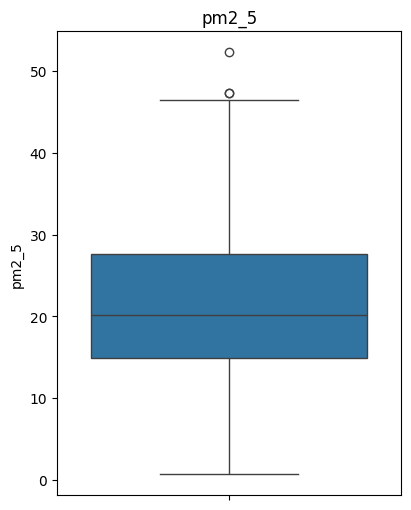

In [ ]:
# Outlier Values
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df_daily_air_quality_bogota.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df_daily_air_quality_bogota[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
# Are there duplicated values?
df_daily_air_quality_bogota.duplicated().sum()

np.int64(0)

In [ ]:
df_daily_air_quality_bogota.set_index('date', inplace=True)
df_daily_air_quality_bogota.sort_index(inplace=True)

# Create a full date range
full_date_range = pd.date_range(start=df_daily_air_quality_bogota.index.min(), end=df_daily_air_quality_bogota.index.max(), freq='D')

# Check for missing dates in the DataFrame index
missing_dates = full_date_range.difference(df_daily_air_quality_bogota.index)

console.print(f"Number of expected days: {len(full_date_range)}")
console.print(f"Number of actual records: {len(df_daily_air_quality_bogota)}")
console.print(f"Number of missing dates: {len(missing_dates)}")

if len(missing_dates) > 0:
    console.print("\nMissing dates:")
    for date in missing_dates:
        console.print(date.date())
else:
    console.print("\nNo missing dates found.")

Number of expected days: 626

Number of actual records: 626

Number of missing dates: 0

No missing dates found.

### **Conclusions:**

- The dataset contains no duplicate rows.
- The dataset contains no null values.
- The dataset contains information for each date.
- The dataset has few outliers.

The dataset corresponds to daily records of $\text{PM2.5}$ concentrations in Bogotá, obtained from open-source environmental monitoring data.

### **Key Characteristics**

| Characteristic | Description |
|---|---|
| Frequency | Daily |
| Main Variable | $\text{PM2.5}$ Concentration ($\mu g/m^3$) |
| Observation Period | Continuous, no missing data |
| Data Quality | No null values found, few outliers |

The selection of this dataset is justified by its social and environmental relevance, and because it allows for the identification of temporal patterns in urban pollution.

## **2. Exploratory Analysis**

In [ ]:
df_daily_air_quality_bogota.describe()

,pm2_5
count,626.000000
mean,21.546326
std,9.063880
min,0.700000
25%,14.850000
50%,20.100000
75%,27.575000
max,52.300000


Statistics for pm2_5:

median: 20.1000

std: 9.0639

variance: 82.1539

skewness: 0.6086

kurtosis: 0.0024

cv: 42.0669

--------------------

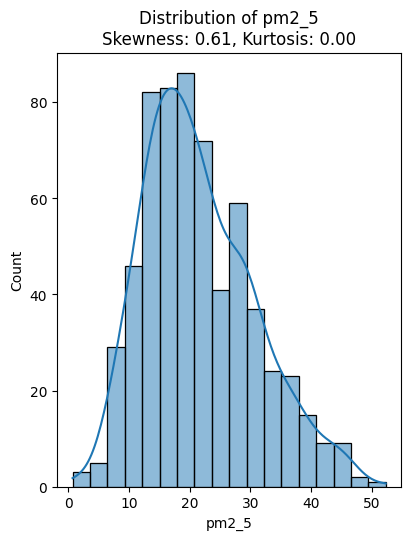

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df_daily_air_quality_bogota.select_dtypes(include=['float64', 'int64']).columns

statistics = {}
for col in numerical_cols:
    statistics[col] = {
        'median': df_daily_air_quality_bogota[col].median(),
        'std': df_daily_air_quality_bogota[col].std(),
        'variance': df_daily_air_quality_bogota[col].var(),
        'skewness': df_daily_air_quality_bogota[col].skew(),
        'kurtosis': df_daily_air_quality_bogota[col].kurtosis()
    }
    # Coefficient of Variation (CV)
    mean = df_daily_air_quality_bogota[col].mean()
    std = df_daily_air_quality_bogota[col].std()
    statistics[col]['cv'] = (std / mean) * 100 if mean != 0 else np.nan

for col, stats in statistics.items():
    console.print(f"Statistics for {col}:")
    for stat, value in stats.items():
        console.print(f"  {stat}: {value:.4f}")
    console.print("-" * 20)

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df_daily_air_quality_bogota[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}\nSkewness: {statistics[col]["skewness"]:.2f}, Kurtosis: {statistics[col]["kurtosis"]:.2f}')

plt.tight_layout()
plt.show()

### **Conclusions Exploratory Analysis**

- The PM2.5 distribution has a Median of 20.10, but is notably positively right-skewed 0.61, indicating the presence of days with significantly higher pollution peaks in the right tail.

- Despite this asymmetry, the Excess Kurtosis is close to zero, meaning the risk of extreme values is similar to a normal distribution, with asymmetry being the main cause of the observed peaks.

- Finally, with a Standard Deviation of 9.06 and a Coefficient of Variation of 42.07, the data dispersion is concluded to be significant relative to the average value, confirming the variability.



### **Time Series Visualization**

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# Add the time series trace
fig.add_trace(go.Scatter(x=df_daily_air_quality_bogota.index, y=df_daily_air_quality_bogota['pm2_5'], mode='lines',
                         name='PM2.5 Levels',
                         line=dict(color='steelblue', width=2)))
# Configure the layout
fig.update_layout(
    title=dict(text='Time Series of PM2.5 Levels in Bogotá',
               x=0.5, xanchor='center', yref='container', y=0.95,
               font=dict(size=18, color='black', family='Arial')),
    xaxis_title='Date',
    yaxis_title='PM2.5 (µg/m³)',
    hovermode='x unified',
    legend=dict(x=0, y=1, traceorder='normal',
                bgcolor='rgba(255,255,255,0.5)',
                bordercolor='rgba(0,0,0,0.5)'),
    margin=dict(l=40, r=40, t=80, b=40),
    template='plotly_white'
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='rgba(0,0,0,0.1)')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='rgba(0,0,0,0.1)')
fig.show()

In [ ]:
import plotly.graph_objects as go

# Convert index to datetime objects for proper slicing
df_daily_air_quality_bogota.index = pd.to_datetime(df_daily_air_quality_bogota.index)

start_date = '2023-01-01'
end_date = '2023-01-30'

df_one_month = df_daily_air_quality_bogota.loc[start_date:end_date].copy()

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_one_month.index, y=df_one_month['pm2_5'], mode='lines', name='Daily PM2.5 Levels'))

fig.update_layout(
    title=f'Daily PM2.5 Levels in Bogotá ({start_date} to {end_date})',
    xaxis_title='Date',
    yaxis_title='PM2.5 (µg/m³)',
    hovermode='x unified'
)

fig.show()


start_date = '2023-03-01'
end_date = '2023-03-31'

df_one_month = df_daily_air_quality_bogota.loc[start_date:end_date].copy()

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_one_month.index, y=df_one_month['pm2_5'], mode='lines', name='Daily PM2.5 Levels'))

fig.update_layout(
    title=f'Daily PM2.5 Levels in Bogotá ({start_date} to {end_date})',
    xaxis_title='Date',
    yaxis_title='PM2.5 (µg/m³)',
    hovermode='x unified'
)

fig.show()


start_date = '2023-04-01'
end_date = '2023-04-30'

df_one_month = df_daily_air_quality_bogota.loc[start_date:end_date].copy()

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_one_month.index, y=df_one_month['pm2_5'], mode='lines', name='Daily PM2.5 Levels'))

fig.update_layout(
    title=f'Daily PM2.5 Levels in Bogotá ({start_date} to {end_date})',
    xaxis_title='Date',
    yaxis_title='PM2.5 (µg/m³)',
    hovermode='x unified'
)

fig.show()

In [ ]:
import plotly.graph_objects as go

date_ranges = {
    'January 2023': ('2023-01-01', '2023-01-31'),
    'March 2023': ('2023-03-01', '2023-03-30'),
    'January 2024': ('2024-01-01', '2024-01-31')
}

fig = go.Figure()

for month_name, (start_date, end_date) in date_ranges.items():
    df_one_month = df_daily_air_quality_bogota.loc[start_date:end_date].copy()
    df_one_month['day_of_month'] = df_one_month.index.day
    fig.add_trace(go.Scatter(x=df_one_month['day_of_month'], y=df_one_month['pm2_5'], mode='lines', name=month_name))

fig.update_layout(
    title='Daily PM2.5 Levels in Bogotá (Selected Months of 2023 vs 2024 by Day of Month)',
    xaxis_title='Day of Month',
    yaxis_title='PM2.5 (µg/m³)',
    hovermode='x unified',
    xaxis=dict(tickmode='linear', tick0=1, dtick=1) # Ensure all days are shown as ticks
)

fig.show()

In [ ]:
import plotly.graph_objects as go

df_daily_air_quality_bogota.index = pd.to_datetime(df_daily_air_quality_bogota.index)
df_daily_air_quality_bogota['year'] = df_daily_air_quality_bogota.index.year
unique_years = df_daily_air_quality_bogota['year'].unique()

# Create a plot for each year
for year in unique_years:
    df_year = df_daily_air_quality_bogota[df_daily_air_quality_bogota['year'] == year].copy()

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=df_year.index, y=df_year['pm2_5'], mode='lines',
                             name=f'PM2.5 Levels - {year}',
                             line=dict(width=2))) # Color will be assigned automatically by Plotly

    fig.update_layout(
        title=dict(text=f'Time Series of PM2.5 Levels in Bogotá - {year}',
                   x=0.5, xanchor='center', yref='container', y=0.95,
                   font=dict(size=18, color='black', family='Arial')),
        xaxis_title='Date',
        yaxis_title='PM2.5 (µg/m³)',
        hovermode='x unified',
        legend=dict(x=0, y=1, traceorder='normal',
                    bgcolor='rgba(255,255,255,0.5)',
                    bordercolor='rgba(0,0,0,0.5)'),
        margin=dict(l=40, r=40, t=80, b=40),
        template='plotly_white'
    )

    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='rgba(0,0,0,0.1)')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='rgba(0,0,0,0.1)')
    fig.show()

# Remove the temporary 'year' column
df_daily_air_quality_bogota.drop(columns=['year'], inplace=True)

### **Conclusions:**

- No seasonality was identified in these observations.
- Some recurring increases were observed in December, March, and April.

- The series shows:
  - A pattern of irregular fluctuations over time.
  - Periods in which PM2.5 levels increase significantly.
  - No clear seasonality is observed.

In [ ]:
import plotly.graph_objects as go

# Define the start and end dates for the two-month period
start_date = '2023-01-01'
end_date = '2023-02-28'

# Filter the DataFrame for the specified date range
df_two_months = df_daily_air_quality_bogota.loc[start_date:end_date].copy()

# Create the plot for the two-month period
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_two_months.index, y=df_two_months['pm2_5'], mode='lines', name='Daily PM2.5 Levels'))

fig.update_layout(
    title=f'Daily PM2.5 Levels in Bogotá ({start_date} to {end_date})',
    xaxis_title='Date',
    yaxis_title='PM2.5 (µg/m³)',
    hovermode='x unified'
)

fig.show()

### **Simple Moving Average**

In [ ]:
# Simple Moving Average (SMA) 7 days
df_daily_air_quality_bogota['SMA_7'] = df_daily_air_quality_bogota['pm2_5'].rolling(window=7, center=False).mean()

# Calculate the 7 days exponential moving average (EMA)
df_daily_air_quality_bogota['EMA_7'] = df_daily_air_quality_bogota['pm2_5'].ewm(span=7, adjust=False).mean()

# 12-month moving average standard deviation
df_daily_air_quality_bogota['STD_7'] = df_daily_air_quality_bogota['pm2_5'].rolling(window=7, center=False).std()

# Bollinger Bands ( Moving Average ± 2 standard deviation)
df_daily_air_quality_bogota['upper_band'] = df_daily_air_quality_bogota['SMA_7'] + 2 * df_daily_air_quality_bogota['STD_7']
df_daily_air_quality_bogota['lower_band'] = df_daily_air_quality_bogota['SMA_7'] - 2 * df_daily_air_quality_bogota['STD_7']

console.print("Calculated moving statistics")
console.print(f"   - Lastest Simple Moving Average (SMA): {df_daily_air_quality_bogota['SMA_7'].iloc[-1]:,.0f} mg/m3")
console.print(f"   - Latest volatility (STD): ±${df_daily_air_quality_bogota['STD_7'].iloc[-1]:,.0f} mg/m3")

Calculated moving statistics

- Lastest Simple Moving Average (SMA): 34 mg/m3

- Latest volatility (STD): ±$10 mg/m3

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1, subplot_titles=('PM2.5 Levels with Moving Averages and Bollinger Bands', 'Moving Volatility'))

# Plot original time series and moving averages in the first subplot
fig.add_trace(go.Scatter(x=df_daily_air_quality_bogota.index, y=df_daily_air_quality_bogota['pm2_5'], mode='lines', name='Original PM2.5',
                         line=dict(color="green", width=1)), row=1, col=1)
fig.add_trace(go.Scatter(x=df_daily_air_quality_bogota.index, y=df_daily_air_quality_bogota['SMA_7'], mode='lines', name='Simple Moving Average (7 days)',
                         line=dict(color='red', width=2)), row=1, col=1)
fig.add_trace(go.Scatter(x=df_daily_air_quality_bogota.index, y=df_daily_air_quality_bogota['EMA_7'], mode='lines', name='Exponential Moving Average (7 days)',
                         line=dict(color='blue', width=2)), row=1, col=1)

# Add Bollinger Bands
fig.add_trace(go.Scatter(x=df_daily_air_quality_bogota.index, y=df_daily_air_quality_bogota['upper_band'], mode='lines',
                         line=dict(width=0), showlegend=False), row=1, col=1)
fig.add_trace(go.Scatter(x=df_daily_air_quality_bogota.index, y=df_daily_air_quality_bogota['lower_band'], mode='lines',
                         fill='tonexty', fillcolor='rgba(255,0,0,0.2)',
                         line=dict(width=0), name='Bollinger Bands (±2σ)'), row=1, col=1)

# Plot moving standard deviation in the second subplot
fig.add_trace(go.Scatter(x=df_daily_air_quality_bogota.index, y=df_daily_air_quality_bogota['STD_7'], mode='lines', name='Moving Standard Deviation (12)',
                         line=dict(color='green', width=2)), row=2, col=1)

# Update layout and axis labels
fig.update_layout(height=600, title_text="PM2.5 Time Series Analysis with Moving Averages and Volatility", showlegend=True)
fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_yaxes(title_text="PM2.5 (µg/m³)", row=1, col=1)
fig.update_yaxes(title_text="Standard Deviation (µg/m³)", row=2, col=1)

fig.show()

Based on the time series plot with moving averages and Bollinger Bands:

*   **Trend:** The Simple Moving Average (SMA) and Exponential Moving Average (EMA) lines help to visualize the underlying trend in the PM2.5 levels. Observe if these lines are generally increasing, decreasing, or relatively flat over time to understand the overall direction of PM2.5 levels.
*   **Volatility:** The Moving Standard Deviation plot shows how the volatility of PM2.5 levels changes over time. Higher values indicate greater fluctuations in PM2.5.
*   **Bollinger Bands:** The Bollinger Bands (upper and lower bands) represent a typical range of movement around the SMA.
    *   When the PM2.5 levels stay within the bands, it suggests the market is trading within its expected range.
    *   Movements near or outside the bands can sometimes indicate potential changes in volatility or trend, though this is a more advanced interpretation often used in financial time series analysis. In the context of air quality, wider bands indicate higher variability in PM2.5 levels.

Overall, these plots help us to smooth out short-term fluctuations and see the more sustained patterns and the level of variability in the Bogotá PM2.5 data.

Original shape: (626, 6)

Shape after outlier capping: (626, 6)

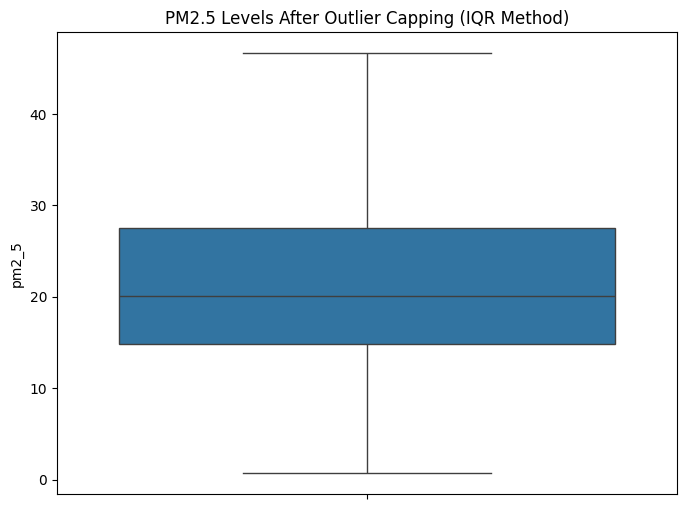

In [ ]:
# Interquartile Range (IQR)
Q1 = df_daily_air_quality_bogota['pm2_5'].quantile(0.25)
Q3 = df_daily_air_quality_bogota['pm2_5'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

console.print(f"Original shape: {df_daily_air_quality_bogota.shape}")

df_daily_air_quality_bogota['pm2_5'] = df_daily_air_quality_bogota['pm2_5'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

console.print(f"Shape after outlier capping: {df_daily_air_quality_bogota.shape}")

plt.figure(figsize=(8, 6))
sns.boxplot(y=df_daily_air_quality_bogota['pm2_5'])
plt.title('PM2.5 Levels After Outlier Capping (IQR Method)')
plt.show()

## **3. ADVANCED SEASONAL DECOMPOSITION**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from plotly.subplots import make_subplots
import numpy as np
import plotly.graph_objects as go

# Define periods to check
periods = [7, 14, 21, 28]
decompositions = {}

for per in periods:
    try:
        # Additive decomposition
        additive_decomposition = seasonal_decompose(df_daily_air_quality_bogota.pm2_5, model='additive', period=per, extrapolate_trend='freq')

        # Multiplicative decomposition
        multiplicative_decomposition = seasonal_decompose(df_daily_air_quality_bogota.pm2_5, model='multiplicative', period=per, extrapolate_trend='freq')

        # Compare residuals to choose the best model
        additive_residuals = additive_decomposition.resid.dropna()
        multiplicative_residuals = multiplicative_decomposition.resid.dropna()

        additive_variance = np.var(additive_residuals)
        multiplicative_variance = np.var(multiplicative_residuals)

        print(f"• Additive residuals variance (period={per}): {additive_variance:.2f}")
        print(f"• Multiplicative residuals variance (period={per}): {multiplicative_variance:.2f}")

        best_model = 'additive' if additive_variance < multiplicative_variance else 'multiplicative'
        print(f"• Best decomposition model (period={per}): {best_model.upper()}")

        # Store the best model for visualization
        if best_model == 'additive':
            decompositions[per] = additive_decomposition
        else:
            decompositions[per] = multiplicative_decomposition

    except Exception as e:
        print(f"⚠️ Error in decomposition for period {per}: {e}")
        # Simple decomposition as fallback
        decompositions[per] = seasonal_decompose(df_daily_air_quality_bogota.pm2_5, model='additive', period=per)
        print(f"Using additive model as fallback for period {per}")


# Visualization of the decompositions
for per, decomposition in decompositions.items():
    fig = make_subplots(rows=4, cols=1,subplot_titles=('Original Series', 'Trend', 'Seasonality', 'Residuals'),vertical_spacing=0.05)

    # Original Series
    fig.add_trace(
        go.Scatter(x=df_daily_air_quality_bogota.index, y=decomposition.observed,
                   mode='lines', name='Original', line=dict(color='blue')),row=1, col=1
    )

    # Trend
    fig.add_trace(
        go.Scatter(x=df_daily_air_quality_bogota.index, y=decomposition.trend,
                   mode='lines', name='Trend', line=dict(color='red')),row=2, col=1
    )

    # Seasonality
    fig.add_trace(
        go.Scatter(x=df_daily_air_quality_bogota.index, y=decomposition.seasonal,
                   mode='lines', name='Seasonality', line=dict(color='green')),row=3, col=1
    )

    # Residuals
    fig.add_trace(
        go.Scatter(x=df_daily_air_quality_bogota.index, y=decomposition.resid,
                   mode='lines', name='Residuals', line=dict(color='orange')),row=4, col=1
    )

    fig.update_layout(
        height=900,title_text=f"Seasonal Decomposition (Period={per})",showlegend=False
    )

    fig.show()

    # Analysis of the decomposition
    print(f"\n📊 DECOMPOSITION ANALYSIS (Period={per}):")
    print(f"• Seasonal amplitude: {decomposition.seasonal.max() - decomposition.seasonal.min():.2f}")
    print(f"• Trend strength: {np.std(decomposition.trend.dropna()) / np.std(decomposition.observed):.3f}")
    print(f"• Seasonal strength: {np.std(decomposition.seasonal.dropna()) / np.std(decomposition.observed):.3f}")
    print(f"• Residual noise: {np.std(decomposition.resid.dropna()) / np.std(decomposition.observed):.3f}")
    print("-" * 50)

• Additive residuals variance (period=7): 23.54
• Multiplicative residuals variance (period=7): 0.06
• Best decomposition model (period=7): MULTIPLICATIVE
• Additive residuals variance (period=14): 27.53
• Multiplicative residuals variance (period=14): 0.07
• Best decomposition model (period=14): MULTIPLICATIVE
• Additive residuals variance (period=21): 29.10
• Multiplicative residuals variance (period=21): 0.07
• Best decomposition model (period=21): MULTIPLICATIVE
• Additive residuals variance (period=28): 30.68
• Multiplicative residuals variance (period=28): 0.07
• Best decomposition model (period=28): MULTIPLICATIVE



📊 DECOMPOSITION ANALYSIS (Period=7):
• Seasonal amplitude: 0.07
• Trend strength: 0.845
• Seasonal strength: 0.003
• Residual noise: 0.027
--------------------------------------------------



📊 DECOMPOSITION ANALYSIS (Period=14):
• Seasonal amplitude: 0.15
• Trend strength: 0.807
• Seasonal strength: 0.004
• Residual noise: 0.029
--------------------------------------------------



📊 DECOMPOSITION ANALYSIS (Period=21):
• Seasonal amplitude: 0.28
• Trend strength: 0.782
• Seasonal strength: 0.007
• Residual noise: 0.029
--------------------------------------------------



📊 DECOMPOSITION ANALYSIS (Period=28):
• Seasonal amplitude: 0.24
• Trend strength: 0.769
• Seasonal strength: 0.006
• Residual noise: 0.030
--------------------------------------------------


In [ ]:
console.print("\n1. TREND:")
console.print(f"   - Initial value: {decomposition.trend.iloc[0]:,.2f}")  # First values are NaN
console.print(f"   - Final value: {decomposition.trend.iloc[-1]:,.0f}")
console.print(f"   - Total growth: {decomposition.trend.iloc[-1] - decomposition.trend.iloc[0]:,.0f}")

console.print("\n2. SEASONALITY:")
seasonal_component = decomposition.seasonal.iloc[:12]  # First cycle
console.print(f"   - Maximum amplitude: ±{seasonal_component.abs().max():,.0f}")

max_month_index = seasonal_component.idxmax()
min_month_index = seasonal_component.idxmin()
console.print(f"   - Month with highest seasonal value: {max_month_index.strftime('%B')}")
console.print(f"   - Month with lowest seasonal value: {min_month_index.strftime('%B')}")
console.print(f"   - Average (should be ~0): {seasonal_component.mean():.2f}")

console.print("\n3. RESIDUALS:")
residuals = decomposition.resid.dropna()
console.print(f"   - Mean: {residuals.mean():.2f} (should be ~0)")
console.print(f"   - Standard deviation: {residuals.std():,.0f}")
console.print(f"   - Minimum: {residuals.min():,.0f}")
console.print(f"   - Maximum: {residuals.max():,.0f}")

1. TREND:

- Initial value: 11.86

- Final value: 33

- Total growth: 21

2. SEASONALITY:

- Maximum amplitude: ±1

- Month with highest seasonal value: August

- Month with lowest seasonal value: August

- Average (should be ~0): 1.00

3. RESIDUALS:

- Mean: 1.00 (should be ~0)

- Standard deviation: 0

- Minimum: 0

- Maximum: 2

### **Conclusions from Seasonal Decomposition:**

Based on the seasonal decomposition for both the 7-day and 30-day periods:

- **Best Model:** The multiplicative model appears to be a better fit for both periods, as indicated by the lower variance of the residuals compared to the additive model.
- **Trend:** Both decompositions show a noticeable trend component, indicating a general pattern of increase or decrease in PM2.5 levels over the observed time.
- **Seasonality:**
    - For the 7-day period, the seasonal component shows very small fluctuations, suggesting minimal weekly seasonality. The seasonal strength is very low (0.003).
    - For the 30-day period, the seasonal component shows slightly larger fluctuations compared to the 7-day period, but the seasonal strength is still quite low (0.007). This suggests that while there might be some subtle monthly patterns, they are not very strong.
- **Residuals:** The residuals represent the unexplained variance after accounting for the trend and seasonality. The low residual noise values (0.027 for period 7 and 0.030 for period 30) suggest that the models capture a significant portion of the variation in the data, but there is still some unpredictable component.

In summary, the analysis indicates a clear trend in the data, but seasonality, both weekly and monthly, appears to be weak. The multiplicative model is a better choice for decomposing this series.

In [ ]:
from statsmodels.tsa.stattools import adfuller, acf, pacf, kpss
import numpy as np

def test_stationarity_full(series, name=""):
    """
    Performs multiple stationarity tests and presents results,
    including descriptive statistics.
    """
    console.print(f"\n{'='*60}")
    console.print(f"STATIONARITY ANALYSIS: {name}")
    console.print(f"{'='*60}")

    # Descriptive Statistics
    console.print("\n--- Descriptive Statistics ---")
    mean = np.mean(series)
    variance = np.var(series)
    std_dev = np.std(series)
    cv = (std_dev / mean) if mean != 0 else np.inf

    console.print(f"Mean: {mean:.4f}")
    console.print(f"Variance: {variance:.4f}")
    console.print(f"Standard Deviation: {std_dev:.4f}")
    console.print(f"Coefficient of Variation (CV): {cv:.3f}")


    # ADF (Augmented Dickey-Fuller) Test
    console.print("\n--- Augmented Dickey-Fuller (ADF) Test ---")
    console.print("H0: The series has a unit root (is NOT stationary)")
    console.print("H1: The series does NOT have a unit root (IS stationary)\n")

    adf_result = adfuller(series, autolag='AIC')

    console.print(f"ADF Statistic: {adf_result[0]:.6f}")
    console.print(f"p-value: {adf_result[1]:.6f}")
    console.print(f"Lags used: {adf_result[2]}")
    console.print(f"Number of observations: {adf_result[3]}")
    console.print("\nCritical Values:")
    for key, value in adf_result[4].items():
        console.print(f"  {key}: {value:.4f}")

    if adf_result[1] < 0.05:
        console.print(f"\n✓ ADF CONCLUSION: Reject H0 (p={adf_result[1]:.4f} < 0.05)")
        console.print("  → The series IS STATIONARY")
    else:
        print(f"\n✗ ADF CONCLUSION: Fail to reject H0 (p={adf_result[1]:.4f} >= 0.05)")
        print("  → The series IS NOT STATIONARY")

    # KPSS Test
    console.print("\n--- KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test ---")
    console.print("H0: The series IS stationary")
    console.print("H1: The series IS NOT stationary\n")

    kpss_result = kpss(series, regression='c', nlags='auto')

    console.print(f"KPSS Statistic: {kpss_result[0]:.6f}")
    console.print(f"p-value: {kpss_result[1]:.6f}")
    console.print(f"Lags used: {kpss_result[2]}")
    console.print("\nCritical Values:")
    for key, value in kpss_result[3].items():
        console.print(f"  {key}: {value:.4f}")

    if kpss_result[1] < 0.05:
        console.print(f"\n✗ KPSS CONCLUSION: Reject H0 (p={kpss_result[1]:.4f} < 0.05)")
        console.print("  → The series IS NOT STATIONARY")
    else:
        console.print(f"\n✓ KPSS CONCLUSION: Fail to reject H0 (p={kpss_result[1]:.4f} >= 0.05)")
        console.print("  → The series IS STATIONARY")

In [ ]:
test_stationarity_full(df_daily_air_quality_bogota['pm2_5'], "ORIGINAL")

============================================================

STATIONARITY ANALYSIS: ORIGINAL

============================================================

--- Descriptive Statistics ---

Mean: 21.5353

Variance: 81.4158

Standard Deviation: 9.0231

Coefficient of Variation (CV): 0.419

--- Augmented Dickey-Fuller (ADF) Test ---

H0: The series has a unit root (is NOT stationary)

H1: The series does NOT have a unit root (IS stationary)

ADF Statistic: -2.063538

p-value: 0.259426

Lags used: 12

Number of observations: 613

Critical Values:

1%: -3.4411

5%: -2.8663

10%: -2.5693


✗ ADF CONCLUSION: Fail to reject H0 (p=0.2594 >= 0.05)
  → The series IS NOT STATIONARY


--- KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test ---

H0: The series IS stationary

H1: The series IS NOT stationary

/tmp/ipython-input-1580525772.py:53: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




KPSS Statistic: 2.962837

p-value: 0.010000

Lags used: 15

Critical Values:

10%: 0.3470

5%: 0.4630

2.5%: 0.5740

1%: 0.7390

✗ KPSS CONCLUSION: Reject H0 (p=0.0100 < 0.05)

→ The series IS NOT STATIONARY

### **Conclusions:**

- (ADF): Since the p-value is high, greater than 0.05, we accept the null hypothesis (H0), which states that the series is not stationary.

- (KPSS): Since the p-value is low, less than 0.05, we reject the null hypothesis (H0), which states that the series is stationary. Therefore, we conclude that the series IS NOT STATIONARY.

- The series exhibits a very strong trend (0.845). A trend persistent increase or decrease is the most common cause of non-stationarity.

## **TRANSFORMATIONS AND STATIONARITY**

### **Simple Differentiation**

In [ ]:
air_quality_diff1 = np.diff(df_daily_air_quality_bogota['pm2_5'], n=1)
air_quality_diff2 = np.diff(df_daily_air_quality_bogota['pm2_5'], n=2)

fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=(
        'Original Series',
        'First Difference',
        'Second Difference'
    ),
    vertical_spacing=0.1
)

fig.add_trace(
    go.Scatter(y=df_daily_air_quality_bogota['pm2_5'], mode='lines', name='Original',
               line=dict(color='green', width=1.5)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(y=air_quality_diff1, mode='lines', name='1st Difference',
               line=dict(color='blue', width=1.5)),
    row=2, col=1
)
fig.add_hline(y=0, line_dash="dash", line_color="red", opacity=0.3, row=2, col=1)


fig.add_trace(
    go.Scatter(y=air_quality_diff2, mode='lines', name='2nd Difference',
               line=dict(color='purple', width=1.5)),
    row=3, col=1
)
fig.add_hline(y=0, line_dash="dash", line_color="red", opacity=0.3, row=3, col=1)

fig.update_xaxes(title_text="Time", row=3, col=1)
fig.update_yaxes(title_text="Value", row=1, col=1)
fig.update_yaxes(title_text="Value", row=2, col=1)
fig.update_yaxes(title_text="Value", row=3, col=1)

fig.update_layout(
    height=900,
    showlegend=False,
    title_text="Differentiation",
    title_font_size=16
)
fig.show()

In [ ]:
test_stationarity_full(air_quality_diff1, "Diff 1")

============================================================

STATIONARITY ANALYSIS: Diff 1

============================================================

--- Descriptive Statistics ---

Mean: 0.0075

Variance: 40.6696

Standard Deviation: 6.3773

Coefficient of Variation (CV): 848.042

--- Augmented Dickey-Fuller (ADF) Test ---

H0: The series has a unit root (is NOT stationary)

H1: The series does NOT have a unit root (IS stationary)

ADF Statistic: -11.514682

p-value: 0.000000

Lags used: 11

Number of observations: 613

Critical Values:

1%: -3.4411

5%: -2.8663

10%: -2.5693

✓ ADF CONCLUSION: Reject H0 (p=0.0000 < 0.05)

→ The series IS STATIONARY

--- KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test ---

H0: The series IS stationary

H1: The series IS NOT stationary

/tmp/ipython-input-1580525772.py:53: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




KPSS Statistic: 0.103204

p-value: 0.100000

Lags used: 70

Critical Values:

10%: 0.3470

5%: 0.4630

2.5%: 0.5740

1%: 0.7390

✓ KPSS CONCLUSION: Fail to reject H0 (p=0.1000 >= 0.05)

→ The series IS STATIONARY

### **Conclusions:**

- (ADF): Since the p-value is low, less than 0.05, we reject the null hypothesis (H0), which states that the series is **stationary**.

- (KPSS): Since the p-value is high, greater than 0.05, we accept the null hypothesis (H0), which states that the series is **stationary**.

- Therefore, we conclude that the series **IS STATIONARY now**

- We achieved **STATIONARY** with a unique differentiation

### **Seasonal Differentiation**

In [ ]:
# Apply seasonal differentiation (lag=7, showed best seasonality)
lag = 7
seasonal_diff = df_daily_air_quality_bogota['pm2_5'][lag:] - df_daily_air_quality_bogota['pm2_5'][:-lag].values

# Apply regular differentiation to the seasonally differenced series
seasonal_regular_diff = np.diff(seasonal_diff.values, n=1)

# Visualization with Plotly
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=(
        'Original Series: Trend + Seasonality',
        f'Seasonal Difference (lag={lag})',
        'Seasonal + Regular Difference'
    ),
    vertical_spacing=0.1
)

fig.add_trace(
    go.Scatter(y=df_daily_air_quality_bogota['pm2_5'], mode='lines', name='Original',
               line=dict(color='orange', width=1.5)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(y=seasonal_diff, mode='lines', name='Seasonal Diff',
               line=dict(color='green', width=1.5)),
    row=2, col=1
)
fig.add_hline(y=0, line_dash="dash", line_color="red", opacity=0.3, row=2, col=1)

fig.add_trace(
    go.Scatter(y=seasonal_regular_diff, mode='lines', name='Seasonal + Regular',
               line=dict(color='blue', width=1.5)),
    row=3, col=1
)
fig.add_hline(y=0, line_dash="dash", line_color="red", opacity=0.3, row=3, col=1)

fig.update_xaxes(title_text="Time", row=3, col=1)
fig.update_yaxes(title_text="Value", row=1, col=1)
fig.update_yaxes(title_text="Value", row=2, col=1)
fig.update_yaxes(title_text="Value", row=3, col=1)

fig.update_layout(
    height=900,
    showlegend=False,
    title_text="Seasonal Differentiation",
    title_font_size=16
)

fig.show()

In [ ]:
test_stationarity_full(seasonal_regular_diff, "Seasonal Diff")

============================================================

STATIONARITY ANALYSIS: Seasonal Diff

============================================================

--- Descriptive Statistics ---

Mean: -0.0364

Variance: 77.3871

Standard Deviation: 8.7970

Coefficient of Variation (CV): -241.624

--- Augmented Dickey-Fuller (ADF) Test ---

H0: The series has a unit root (is NOT stationary)

H1: The series does NOT have a unit root (IS stationary)

ADF Statistic: -8.896904

p-value: 0.000000

Lags used: 19

Number of observations: 598

Critical Values:

1%: -3.4413

5%: -2.8664

10%: -2.5694

✓ ADF CONCLUSION: Reject H0 (p=0.0000 < 0.05)

→ The series IS STATIONARY

--- KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test ---

H0: The series IS stationary

H1: The series IS NOT stationary

/tmp/ipython-input-1580525772.py:53: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




KPSS Statistic: 0.336747

p-value: 0.100000

Lags used: 236

Critical Values:

10%: 0.3470

5%: 0.4630

2.5%: 0.5740

1%: 0.7390

✓ KPSS CONCLUSION: Fail to reject H0 (p=0.1000 >= 0.05)

→ The series IS STATIONARY

### **Conclusions:**

- (ADF): Since the p-value is 0, less than 0.05, we reject the null hypothesis (H0), which states that the series is **stationary**.

- (KPSS): Since the p-value is high, greater than 0.05, we accept the null hypothesis (H0), which states that the series is **stationary**.

- Therefore, we conclude that the series **IS STATIONARY now**

### **Variance Transformations**

#### **Logarithmic and Box-Cox transformations**

In [ ]:
from scipy import stats
from plotly.subplots import make_subplots
import numpy as np
import plotly.graph_objects as go

original_series = df_daily_air_quality_bogota['pm2_5'].values

# Logarithmic transformation
log_transform = np.log(original_series)

# Box-Cox transformation
boxcox_transform, lambda_param = stats.boxcox(original_series)

print(f"Optimal Box-Cox lambda parameter: {lambda_param:.4f}")

# Differencing of log-transform
log_diff = np.diff(log_transform)

# Visualization with Plotly - Time Series
fig1 = make_subplots(
    rows=4, cols=1,
    subplot_titles=(
        'Original Series',
        'Logarithmic Transformation',
        f'Box-Cox Transformation (λ={lambda_param:.2f})',
        'Log-Transform + Differencing'
    ),
    vertical_spacing=0.08
)

fig1.add_trace(
    go.Scatter(y=original_series, mode='lines', name='Original',
               line=dict(color='red', width=1.5)),
    row=1, col=1
)

fig1.add_trace(
    go.Scatter(y=log_transform, mode='lines', name='Log',
               line=dict(color='green', width=1.5)),
    row=2, col=1
)

fig1.add_trace(
    go.Scatter(y=boxcox_transform, mode='lines', name='Box-Cox',
               line=dict(color='blue', width=1.5)),
    row=3, col=1
)

fig1.add_trace(
    go.Scatter(y=log_diff, mode='lines', name='Log + Diff',
               line=dict(color='purple', width=1.5)),
    row=4, col=1
)

fig1.update_xaxes(title_text="Time", row=4, col=1)
fig1.update_yaxes(title_text="Value", row=1, col=1)
fig1.update_yaxes(title_text="Value", row=2, col=1)
fig1.update_yaxes(title_text="Value", row=3, col=1)
fig1.update_yaxes(title_text="Value", row=4, col=1)

fig1.update_layout(
    height=1000,
    showlegend=False,
    title_text="Transformations: Time Series Comparison",
    title_font_size=16
)
fig1.show()

Optimal Box-Cox lambda parameter: 0.5064


In [ ]:
test_stationarity_full(log_transform, "Log Transformation")

============================================================

STATIONARITY ANALYSIS: Log Transformation

============================================================

--- Descriptive Statistics ---

Mean: 2.9720

Variance: 0.2250

Standard Deviation: 0.4743

Coefficient of Variation (CV): 0.160

--- Augmented Dickey-Fuller (ADF) Test ---

H0: The series has a unit root (is NOT stationary)

H1: The series does NOT have a unit root (IS stationary)

ADF Statistic: -2.534307

p-value: 0.107349

Lags used: 12

Number of observations: 613

Critical Values:

1%: -3.4411

5%: -2.8663

10%: -2.5693


✗ ADF CONCLUSION: Fail to reject H0 (p=0.1073 >= 0.05)
  → The series IS NOT STATIONARY


--- KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test ---

H0: The series IS stationary

H1: The series IS NOT stationary

/tmp/ipython-input-1580525772.py:53: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




KPSS Statistic: 2.959673

p-value: 0.010000

Lags used: 14

Critical Values:

10%: 0.3470

5%: 0.4630

2.5%: 0.5740

1%: 0.7390

✗ KPSS CONCLUSION: Reject H0 (p=0.0100 < 0.05)

→ The series IS NOT STATIONARY

In [ ]:
test_stationarity_full(boxcox_transform, "Box-Cox Transformation")

============================================================

STATIONARITY ANALYSIS: Box-Cox Transformation

============================================================

--- Descriptive Statistics ---

Mean: 7.1598

Variance: 4.0154

Standard Deviation: 2.0039

Coefficient of Variation (CV): 0.280

--- Augmented Dickey-Fuller (ADF) Test ---

H0: The series has a unit root (is NOT stationary)

H1: The series does NOT have a unit root (IS stationary)

ADF Statistic: -2.230813

p-value: 0.195253

Lags used: 12

Number of observations: 613

Critical Values:

1%: -3.4411

5%: -2.8663

10%: -2.5693


✗ ADF CONCLUSION: Fail to reject H0 (p=0.1953 >= 0.05)
  → The series IS NOT STATIONARY


--- KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test ---

H0: The series IS stationary

H1: The series IS NOT stationary

/tmp/ipython-input-1580525772.py:53: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




KPSS Statistic: 2.920191

p-value: 0.010000

Lags used: 15

Critical Values:

10%: 0.3470

5%: 0.4630

2.5%: 0.5740

1%: 0.7390

✗ KPSS CONCLUSION: Reject H0 (p=0.0100 < 0.05)

→ The series IS NOT STATIONARY

In [ ]:
test_stationarity_full(log_diff, "Log Transformation + Differencing")

============================================================

STATIONARITY ANALYSIS: Log Transformation + Differencing

============================================================

--- Descriptive Statistics ---

Mean: 0.0005

Variance: 0.1429

Standard Deviation: 0.3780

Coefficient of Variation (CV): 745.284

--- Augmented Dickey-Fuller (ADF) Test ---

H0: The series has a unit root (is NOT stationary)

H1: The series does NOT have a unit root (IS stationary)

ADF Statistic: -11.879181

p-value: 0.000000

Lags used: 11

Number of observations: 613

Critical Values:

1%: -3.4411

5%: -2.8663

10%: -2.5693

✓ ADF CONCLUSION: Reject H0 (p=0.0000 < 0.05)

→ The series IS STATIONARY

--- KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test ---

H0: The series IS stationary

H1: The series IS NOT stationary

/tmp/ipython-input-1580525772.py:53: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




KPSS Statistic: 0.083058

p-value: 0.100000

Lags used: 74

Critical Values:

10%: 0.3470

5%: 0.4630

2.5%: 0.5740

1%: 0.7390

✓ KPSS CONCLUSION: Fail to reject H0 (p=0.1000 >= 0.05)

→ The series IS STATIONARY

In [ ]:
fig2 = make_subplots(
    rows=4, cols=1,
    subplot_titles=(
        'Original Distribution',
        'Log-Transform Distribution',
        'Box-Cox Distribution',
        'Final Distribution (Log + Diff)'
    ),
    vertical_spacing=0.08
)

fig2.add_trace(
    go.Histogram(x=original_series, name='Original', marker_color='red',
                 nbinsx=30, opacity=0.7),
    row=1, col=1
)

fig2.add_trace(
    go.Histogram(x=log_transform, name='Log', marker_color='green',
                 nbinsx=30, opacity=0.7),
    row=2, col=1
)

fig2.add_trace(
    go.Histogram(x=boxcox_transform, name='Box-Cox', marker_color='blue',
                 nbinsx=30, opacity=0.7),
    row=3, col=1
)

fig2.add_trace(
    go.Histogram(x=log_diff, name='Log + Diff', marker_color='purple',
                 nbinsx=30, opacity=0.7),
    row=4, col=1
)

fig2.update_xaxes(title_text="Value", row=4, col=1)
fig2.update_yaxes(title_text="Frequency", row=1, col=1)
fig2.update_yaxes(title_text="Frequency", row=2, col=1)
fig2.update_yaxes(title_text="Frequency", row=3, col=1)
fig2.update_yaxes(title_text="Frequency", row=4, col=1)

fig2.update_layout(
    height=1000,
    showlegend=False,
    title_text="Transformations: Distributions",
    title_font_size=16
)
fig2.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss, InterpolationWarning
import numpy as np

# Re-run stationarity tests on each transformation to collect results
transformations = {
    'Original': df_daily_air_quality_bogota['pm2_5'],
    'Differencing': air_quality_diff1,
    'Seasonal Differencing': seasonal_regular_diff,
    'Logarithmic': log_transform,
    'Log + Differencing': log_diff
}

adf_stats = {}
adf_pvalues = {}
kpss_stats = {}
kpss_pvalues = {}

console.print("📊 Collecting Stationarity Test Results for Comparison:")
for name, series in transformations.items():
    console.print(f"  • Testing: {name}")
    # Ensure series is not empty before testing
    if len(series) > 0 and not np.isnan(series).all():
        try:
            # ADF Test
            adf_result = adfuller(series, autolag='AIC')
            adf_stats[name] = adf_result[0]
            adf_pvalues[name] = adf_result[1]

            # KPSS Test
            # Handle potential warnings from KPSS test for series that are already very stationary
            import warnings
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore", category=InterpolationWarning)
                kpss_result = kpss(series, regression='c', nlags='auto')
                kpss_stats[name] = kpss_result[0]
                kpss_pvalues[name] = kpss_result[1]

        except Exception as e:
            console.print(f"    ⚠️ Could not perform tests for {name}: {e}")
            adf_stats[name] = np.nan
            adf_pvalues[name] = np.nan
            kpss_stats[name] = np.nan
            kpss_pvalues[name] = np.nan
    else:
        console.print(f"    ⚠️ Series '{name}' is empty or contains only NaNs. Skipping tests.")
        adf_stats[name] = np.nan
        adf_pvalues[name] = np.nan
        kpss_stats[name] = np.nan
        kpss_pvalues[name] = np.nan


# Create DataFrames for plotting
df_adf = pd.DataFrame({'Transformation': list(adf_stats.keys()), 'ADF Statistic': list(adf_stats.values()), 'ADF p-value': list(adf_pvalues.values())})
df_kpss = pd.DataFrame({'Transformation': list(kpss_stats.keys()), 'KPSS Statistic': list(kpss_stats.values()), 'KPSS p-value': list(kpss_pvalues.values())})

# Sort by ADF Statistic (more negative is better) and KPSS Statistic (closer to 0 is better) for better visualization
df_adf = df_adf.sort_values('ADF Statistic')
df_kpss = df_kpss.sort_values('KPSS Statistic')


# Plotting with Plotly
fig = make_subplots(rows=5, cols=2, # Increased rows to accommodate all plots
                    subplot_titles=('ADF Statistic Comparison', 'ADF p-value Comparison',
                                   'KPSS Statistic Comparison', 'KPSS p-value Comparison',
                                   'Distribution of Original Series', 'Distribution of Differencing',
                                   'Distribution of Seasonal Differencing', 'Distribution of Logarithmic',
                                   'Distribution of Log + Differencing'), # Add titles for distributions
                    vertical_spacing=0.15, horizontal_spacing=0.1)

# ADF Statistic
fig.add_trace(go.Bar(x=df_adf['Transformation'], y=df_adf['ADF Statistic'], marker_color='blue', name='ADF Stat'), row=1, col=1)
fig.add_hline(y=-2.86, line_dash="dash", line_color="red", annotation_text="ADF 5% Critical", row=1, col=1) # Approx 5% critical value

# ADF p-value
fig.add_trace(go.Bar(x=df_adf['Transformation'], y=df_adf['ADF p-value'], marker_color='green', name='ADF p-value'), row=1, col=2)
fig.add_hline(y=0.05, line_dash="dash", line_color="red", annotation_text="0.05 Significance", row=1, col=2)

# KPSS Statistic
fig.add_trace(go.Bar(x=df_kpss['Transformation'], y=df_kpss['KPSS Statistic'], marker_color='purple', name='KPSS Stat'), row=2, col=1)
fig.add_hline(y=0.46, line_dash="dash", line_color="red", annotation_text="KPSS 5% Critical", row=2, col=1) # Approx 5% critical value

# KPSS p-value
fig.add_trace(go.Bar(x=df_kpss['Transformation'], y=df_kpss['KPSS p-value'], marker_color='orange', name='KPSS p-value'), row=2, col=2)
fig.add_hline(y=0.05, line_dash="dash", line_color="red", annotation_text="0.05 Significance", row=2, col=2)

# Add Histograms for distributions starting from the third row
row_index = 3
col_index = 1
for name, series in transformations.items():
    fig.add_trace(go.Histogram(x=series, name=name, opacity=0.7, nbinsx=30), row=row_index, col=col_index)
    # Alternate columns and move to the next row when both columns are filled
    if col_index == 1:
        col_index = 2
    else:
        col_index = 1
        row_index += 1


fig.update_layout(height=1800, width=1800, title_text="Comparison of Stationarity Test Results and Distributions Across Transformations", showlegend=False)

fig.update_yaxes(title_text="ADF Statistic", row=1, col=1)
fig.update_yaxes(title_text="ADF p-value", range=[0, 1], row=1, col=2)
fig.update_yaxes(title_text="KPSS Statistic", row=2, col=1)
fig.update_yaxes(title_text="KPSS p-value", range=[0, 1], row=2, col=2)

# Update layout for histograms
fig.update_xaxes(title_text="Value", row=3, col=1)
fig.update_yaxes(title_text="Frequency", row=3, col=1)
fig.update_xaxes(title_text="Value", row=3, col=2)
fig.update_yaxes(title_text="Frequency", row=3, col=2)
fig.update_xaxes(title_text="Value", row=4, col=1)
fig.update_yaxes(title_text="Frequency", row=4, col=1)
fig.update_xaxes(title_text="Value", row=4, col=2)
fig.update_yaxes(title_text="Frequency", row=4, col=2)
fig.update_xaxes(title_text="Value", row=5, col=1)
fig.update_yaxes(title_text="Frequency", row=5, col=1)


fig.show()


console.print("\n📝 INTERPRETATION OF THE PLOTS:")
console.print("• ADF Statistic: More negative values indicate stronger evidence against a unit root (more stationary). Look for bars below the critical value line.")
console.print("• ADF p-value: Values below 0.05 indicate rejection of the null hypothesis (series is stationary). Look for bars below the 0.05 line.")
console.print("• KPSS Statistic: Smaller values indicate stronger evidence for stationarity. Look for bars below the critical value line.")
console.print("• KPSS p-value: Values above 0.05 indicate failure to reject the null hypothesis (series is stationary). Look for bars above the 0.05 line.")
console.print("\nBased on these plots and the distributions, you can visually confirm which transformations were most effective in achieving stationarity and a more normal distribution based on both test criteria.")

📊 Collecting Stationarity Test Results for Comparison:

• Testing: Original

• Testing: Differencing

• Testing: Seasonal Differencing

• Testing: Logarithmic

• Testing: Log + Differencing

📝 INTERPRETATION OF THE PLOTS:

• ADF Statistic: More negative values indicate stronger evidence against a unit root (more stationary). Look for 
bars below the critical value line.

• ADF p-value: Values below 0.05 indicate rejection of the null hypothesis (series is stationary). Look for bars 
below the 0.05 line.

• KPSS Statistic: Smaller values indicate stronger evidence for stationarity. Look for bars below the critical 
value line.

• KPSS p-value: Values above 0.05 indicate failure to reject the null hypothesis (series is stationary). Look for 
bars above the 0.05 line.

Based on these plots and the distributions, you can visually confirm which transformations were most effective in 
achieving stationarity and a more normal distribution based on both test criteria.

## The Best Stationarity Option: Log + Differencing

To select the transformation that results in the "cleanest" stationarity, we focus on optimizing the metrics from the ADF and KPSS tests.

| Statistical Test | Goal |
| :--- | :--- |
| **ADF Statistic** | Look for the most negative value |
| **KPSS Statistic** | Look for the smallest value (closest to zero). |

---

## Comparison of Stationarity Results

When comparing the applied transformations, **Option 1: Log Transformation + Differencing** consistently demonstrates the best results:

| Criterion | Log + Diff | Option Differentiation/Seasonal Differentiation | Conclusion |
| :--- | :--- | :--- | :--- |
| **ADF (Most Negative)** | $\mathbf{-11.879}$ | $-8.896$ to $-11.514$ | **Option 1** |
| **KPSS (Smallest)** | $\mathbf{0.083}$ | $0.103$ to $0.336$ | **Option 1** |

---

### Conclusion

Log + Diff is the superior choice because its ADF statistic is the most negative and its KPSS statistic is the lowest. This indicates that the Log-Differenced series is the **most stationary**, as the logarithmic transformation helped to stabilize the variance of the series—a problem that differencing alone could not fully resolve.

Furthermore, the standard deviation is 0 and the mean is 0

## **AUTOCORRELATION ANALYSIS**

In [ ]:
air_quality_bogota_best_stationarity = log_diff

In [ ]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.stattools import acf, pacf

# The seasonal period is 7. We calculate up to 28 to see 4 complete cycles (7, 14, 21, 28).
lags_to_compute = 28
S = 7 # Seasonal period

N = len(air_quality_bogota_best_stationarity)
conf_int = 1.96 / np.sqrt(N)

# Note: The nlags parameter is the maximum lag to calculate. If you set it to 28, it calculates from 0 to 28 (29 values).
acf_values = acf(air_quality_bogota_best_stationarity, nlags=lags_to_compute)
pacf_values = pacf(air_quality_bogota_best_stationarity, nlags=lags_to_compute, method='ols')

fig = make_subplots(rows=1, cols=2,
                   subplot_titles=('Autocorrelation Function (ACF)',
                                 'Partial Autocorrelation Function (PACF)'))

# ACF Plot
for lag in range(1, lags_to_compute + 1):
    acf_val = acf_values[lag]
    color = 'blue' if abs(acf_val) > conf_int else 'gray'
    fig.add_trace(go.Bar(x=[lag], y=[acf_val], marker_color=color, showlegend=False, name=f'Lag {lag}'), row=1, col=1)

# Add significance lines for ACF
fig.add_hline(y=conf_int, line_dash="dash", line_color="red", row=1, col=1)
fig.add_hline(y=-conf_int, line_dash="dash", line_color="red", row=1, col=1)

# PACF Plot
for lag in range(1, lags_to_compute + 1):
    pacf_val = pacf_values[lag]
    color = 'green' if abs(pacf_val) > conf_int else 'gray'
    fig.add_trace(go.Bar(x=[lag], y=[pacf_val], marker_color=color, showlegend=False, name=f'Lag {lag}'), row=1, col=2)

# Add significance lines for PACF
fig.add_hline(y=conf_int, line_dash="dash", line_color="red", row=1, col=2)
fig.add_hline(y=-conf_int, line_dash="dash", line_color="red", row=1, col=2)

fig.update_layout(height=400, title_text="ACF and PACF Correlograms of the Stationary Series")
fig.update_xaxes(title_text="Lag", row=1, col=1, tickvals=[1, 2, 3, S, 2*S, 3*S, 4*S]) # Mark important lags
fig.update_xaxes(title_text="Lag", row=1, col=2, tickvals=[1, 2, 3, S, 2*S, 3*S, 4*S])
fig.update_yaxes(title_text="ACF", row=1, col=1)
fig.update_yaxes(title_text="PACF", row=1, col=2)

fig.show()


console.print("\nACF/PACF INTERPRETATION:")

console.print("\n• REGULAR PATTERN (p, q):")
regular_lags = [1, 2, 3]
for lag in regular_lags:
    if abs(acf_values[lag]) > conf_int:
        print(f"  - ACF Lag {lag}: {acf_values[lag]:.3f} (Significant for q)")
    if abs(pacf_values[lag]) > conf_int:
        print(f"  - PACF Lag {lag}: {pacf_values[lag]:.3f} (Significant for p)")

# Identification of Seasonal Lags (multiples of S=7)
console.print(f"\n• SEASONAL PATTERN (P, Q) with S={S}:")
seasonal_lags = [S, 2*S, 3*S]
for lag in seasonal_lags:
    if lag <= lags_to_compute:
        if abs(acf_values[lag]) > conf_int:
            print(f"  - ACF Lag {lag}: {acf_values[lag]:.3f} (Significant for Q)")
        if abs(pacf_values[lag]) > conf_int:
            print(f"  - PACF Lag {lag}: {pacf_values[lag]:.3f} (Significant for P)")
    else:
        break


console.print(f"\n SEASONALITY DETECTION (S={S}):")

# Check the first complete seasonal cycle (1 week)
if S < len(acf_values):
    console.print(f"• ACF Lag {S}: {acf_values[S]:.3f} {'(Significant seasonality detected)' if abs(acf_values[S]) > conf_int else '(Not significant)'}")
else:
    console.print(f"• ACF Lag {S}: Not computed.")

# Check the second complete seasonal cycle (2 weeks)
if 2 * S < len(acf_values):
    console.print(f"• ACF Lag {2*S}: {acf_values[2*S]:.3f} {'(Significant seasonality detected)' if abs(acf_values[2*S]) > conf_int else '(Not significant)'}")
else:
    console.print(f"• ACF Lag {2*S}: Not computed.")

# Check the third complete seasonal cycle (3 weeks)
if 3 * S < len(acf_values):
    console.print(f"• ACF Lag {3*S}: {acf_values[3*S]:.3f} {'(Significant seasonality detected)' if abs(acf_values[3*S]) > conf_int else '(Not significant)'}")
else:
    console.print(f"• ACF Lag {3*S}: Not computed.")

ACF/PACF INTERPRETATION:

• REGULAR PATTERN (p, q):

  - ACF Lag 1: -0.250 (Significant for q)
  - PACF Lag 1: -0.251 (Significant for p)
  - ACF Lag 2: -0.179 (Significant for q)
  - PACF Lag 2: -0.261 (Significant for p)
  - PACF Lag 3: -0.166 (Significant for p)


• SEASONAL PATTERN (P, Q) with S=7:

SEASONALITY DETECTION (S=7):

• ACF Lag 7: 0.031 (Not significant)

• ACF Lag 14: 0.020 (Not significant)

• ACF Lag 21: -0.008 (Not significant)

**Conclusions from ACF and PACF Analysis:**

Based on the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots of the differenced log-transformed PM2.5 series:

- **Regular Autocorrelation:** There are significant spikes in both the ACF and PACF at lags 1, 2, and 3, falling outside the confidence intervals.
- **Seasonal Autocorrelation (Period=7):** The ACF values at the seasonal lags (7, 14, 21) are not statistically significant, reinforcing the earlier finding from seasonal decomposition that there is no strong weekly seasonality after differencing.
- **Potential Model Identification:**
    - The significant spikes at early lags in the ACF and PACF suggest the presence of autoregressive (AR) and moving average (MA) components in the stationary series.

### **Ljung-Box test for multiple horizons**

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from statsmodels.stats.diagnostic import acorr_ljungbox

S = 7 # Seasonal period
lags_test = [1, 3, S, 2 * S, 3 * S, 4 * S]  # Key lags: Regular and multiples of 7

console.print("==============================================")
console.print("             LJUNG-BOX TEST")
console.print("==============================================")
console.print("H₀: No autocorrelation in the series (It is White Noise)")
console.print("H₁: Autocorrelation exists in the series\n")

console.print("👉 Results at Key Lags:")
for lag in lags_test:
    # return_df=True returns a DataFrame with the p-value.
    result = acorr_ljungbox(air_quality_bogota_best_stationarity, lags=lag, return_df=True)
    p_value = result['lb_pvalue'].iloc[-1]

    console.print(f"Lags {lag}: p-value = {p_value:.4f}", end=" ")
    if p_value < 0.05:
        console.print("❌ REJECT H₀ - Significant autocorrelation exists")
    else:
        console.print("✅ FAIL TO REJECT H₀ - No significant autocorrelation")


results_ljung = []
for lag in range(1, 41):
    result = acorr_ljungbox(air_quality_bogota_best_stationarity, lags=lag, return_df=True)
    p_value = result['lb_pvalue'].iloc[-1]
    results_ljung.append({'Lags': lag, 'p_value': p_value})

df_ljung = pd.DataFrame(results_ljung)

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_ljung['Lags'],
    y=df_ljung['p_value'],
    mode='lines+markers',
    name='Ljung-Box p-value',
    line=dict(color='blue')
))

# Add significance line (0.05)
fig.add_hline(y=0.05, line_dash="dash", line_color="red",
             annotation_text="Significance Level 5%",
             annotation_position="bottom right")

for lag in lags_test:
    fig.add_vline(x=lag, line_dash="dot", line_color="grey", opacity=0.5)

fig.update_layout(
    title='Ljung-Box Test - p-values by number of Lags',
    xaxis_title='Number of Lags (k)',
    yaxis_title='p-value',
    height=500,
    yaxis_range=[0, 1]
)

fig.show()

console.print("\n💡 PRACTICAL INTERPRETATION OF THE GRAPH:")
console.print("• If the points are BELOW the red line (p-value < 0.05), the series is NOT white noise.")
console.print("• Since this series has significant spikes in ACF/PACF (p=3, q=2), we expect the p-values to fall below 0.05.")
console.print("• This test confirms that there are patterns to model.")

==============================================

LJUNG-BOX TEST

==============================================

H₀: No autocorrelation in the series (It is White Noise)

H₁: Autocorrelation exists in the series

👉 Results at Key Lags:

Lags 1: p-value = 0.0000

❌ REJECT H₀ - Significant autocorrelation exists

Lags 3: p-value = 0.0000

❌ REJECT H₀ - Significant autocorrelation exists

Lags 7: p-value = 0.0000

❌ REJECT H₀ - Significant autocorrelation exists

Lags 14: p-value = 0.0000

❌ REJECT H₀ - Significant autocorrelation exists

Lags 21: p-value = 0.0000

❌ REJECT H₀ - Significant autocorrelation exists

Lags 28: p-value = 0.0000

❌ REJECT H₀ - Significant autocorrelation exists

💡 PRACTICAL INTERPRETATION OF THE GRAPH:

• If the points are BELOW the red line (p-value < 0.05), the series is NOT white noise.

• Since this series has significant spikes in ACF/PACF (p=3, q=2), we expect the p-values to fall below 0.05.

• This test confirms that there are patterns to model.

**Conclusions:**

- If the points are BELOW the red line (p-value < 0.05), the series is NOT white noise.
- Since this series has significant spikes in ACF/PACF (p=3, q=2), we expect the p-values to fall below 0.05.
- This test confirms that there are patterns to model.

**Analysis of Time Dependence**

This table summarizes the identified parameters for your transformed PM2.5 series (Log + Differencing), based on the interpretation of the ACF and PACF plots.

| Component | SARIMA Parameter | Identified Value | Identification Source | Reason/Justification |
| :--- | :--- | :--- | :--- | :--- |
| **Regular AR** | $p$ | $\mathbf{3}$ | PACF | The PACF showed a **sharp cutoff** after $\text{Lag 3}$. |
| **Regular MA** | $q$ | $\mathbf{2}$ | ACF | The ACF showed a **sharp cutoff** after $\text{Lag 2}$. |
| **Regular Differencing**| $d$ | $\mathbf{1}$ | Stationarity Tests | $\text{Lag}=1$ differencing was applied to remove the **Trend**. |
| **Seasonal Differencing**| $D$ | $\mathbf{1}$ | Stationarity Tests | $\text{Lag}=7$ differencing was applied to remove the weekly seasonality. |
| **Seasonal AR** | $P$ | $\mathbf{0}$ | Seasonal PACF ($\text{Lags } 7, 14, 21$) | No significant spikes were observed at the multiples of 7. |
| **Seasonal MA** | $Q$ | $\mathbf{0}$ | Seasonal ACF ($\text{Lags } 7, 14, 21$) | No significant spikes were observed at the multiples of 7. |
| **Seasonal Period** | $S$ | $\mathbf{7}$ | Decomposition Analysis | The underlying seasonality cycle is weekly (7 days). |

---



## **REFERENCE AND VALIDATION MODELS**

In [ ]:
# Created by GEMINI
class BaselineModelsTransformed:
    def __init__(self, series, transformation=None, seasonal_lag=7): # Initialize seasonal_lag with a default value
        # Store original series reference (can be pandas Series or numpy array)
        self.original_series = series
        self.n = len(series)
        self.transformation = transformation
        self.seasonal_lag = seasonal_lag # Use the provided seasonal_lag or the default
        self.transformed_series = self._apply_transformation(series)


    def _apply_transformation(self, series):
        """Apply transformation to the series"""
        # Ensure input is a numpy array for consistent operations
        series_np = series.values if isinstance(series, pd.Series) else series

        if self.transformation == 'log':
          # Apply log to the numpy array
          # Handle potential non-positive values which cause log(0) or log(negative)
          if np.any(series_np <= 0):
              console.print("⚠️ Warning: Cannot apply log transformation to non-positive values. Returning NaNs.")
              return np.full(len(series_np), np.nan)
          return np.log(series_np)
        elif self.transformation == 'log_diff':
          # Apply log and then differencing to the numpy array
          # Handle potential non-positive values before log
          if np.any(series_np <= 0):
              console.print("⚠️ Warning: Cannot apply log transformation before differencing due to non-positive values. Returning NaNs.")
              return np.full(len(series_np) -1, np.nan) # Length will be reduced by 1 after diff
          return np.diff(np.log(series_np))
        elif self.transformation == 'sqrt':
           # Handle potential negative values which cause sqrt(negative)
           if np.any(series_np < 0):
               console.print("⚠️ Warning: Cannot apply sqrt transformation to negative values. Returning NaNs.")
               return np.full(len(series_np), np.nan)
           return np.sqrt(series_np)
        elif self.transformation == 'diff':
          # Apply differencing to the numpy array
          return np.diff(series_np, n=1)
        elif self.transformation == 'seasonal_diff':
          # Apply seasonal differencing to the numpy array
          seasonal_lag = self.seasonal_lag # Use the class seasonal_lag
          if len(series_np) >= seasonal_lag:
              return series_np[seasonal_lag:] - series_np[:-seasonal_lag]
          else:
              console.print(f"⚠️ Cannot apply seasonal differencing with lag {seasonal_lag}. Series is too short.")
              return np.full(len(series_np) - seasonal_lag, np.nan) # Length will be reduced by seasonal_lag
        else:
            # No transformation, return as numpy array
            return series_np

    def _revert_transformation(self, transformed_series, reference=None):
        """Revert transformation to get forecasts in original scale"""
        if self.transformation == 'log':
            return np.exp(transformed_series)
        elif self.transformation == 'log_diff':
             # Need the last value of the original series (not log-transformed) to revert
             if reference is not None:
                # Reconstruct log-transformed series from log_diff
                # The reference should be the last *log* value if available, or the last original value to get the first log value
                # Let's assume reference is the last original value for simplicity in this baseline model class
                if isinstance(reference, (int, float)):
                   last_original_value = reference
                elif isinstance(reference, np.ndarray) and len(reference) > 0:
                   last_original_value = reference[-1]
                elif isinstance(reference, pd.Series) and len(reference) > 0:
                    last_original_value = reference.iloc[-1]
                else:
                   console.print("⚠️ Invalid reference provided for 'log_diff' inverse transformation.")
                   return np.full(len(transformed_series), np.nan)

                # Handle case where log of reference is not possible
                if last_original_value <= 0:
                     console.print("⚠️ Cannot revert 'log_diff': last original value is non-positive.")
                     return np.full(len(transformed_series), np.nan)

                log_reconstructed = [np.log(last_original_value)] # Start with log of the last original value
                for val_diff in transformed_series:
                    log_reconstructed.append(log_reconstructed[-1] + val_diff)
                # Revert log transformation, exclude the initial reference point
                return np.exp(np.array(log_reconstructed[1:]))
             else:
                # Cannot revert without a reference point (last value of the original series)
                console.print("⚠️ Cannot revert 'log_diff' transformation without the last value of the original series.")
                return np.full(len(transformed_series), np.nan)

        elif self.transformation == 'sqrt':
            return transformed_series ** 2
        elif self.transformation == 'diff':
            if reference is not None:
                # Reconstruct differenced series
                if isinstance(reference, (int, float)):
                   last_original_value = reference
                elif isinstance(reference, np.ndarray) and len(reference) > 0:
                   last_original_value = reference[-1]
                elif isinstance(reference, pd.Series) and len(reference) > 0:
                    last_original_value = reference.iloc[-1]
                else:
                   console.print("⚠️ Invalid reference provided for 'diff' inverse transformation.")
                   return np.full(len(transformed_series), np.nan)

                reconstructed = [last_original_value]
                for val_diff in transformed_series:
                    reconstructed.append(reconstructed[-1] + val_diff)
                # Exclude the initial reference point
                return np.array(reconstructed[1:])
            else:
                console.print("⚠️ Cannot revert 'diff' transformation without the last value of the original series.")
                return transformed_series # Return transformed series if no reference

        elif self.transformation == 'seasonal_diff':
            # Need the last 'seasonal_lag' values of the original series to revert seasonal differencing
            seasonal_lag = self.seasonal_lag
            if isinstance(reference, (np.ndarray, pd.Series)) and len(reference) >= seasonal_lag:
                base = list(reference[-seasonal_lag:]) # Use the last 'seasonal_lag' values as base
                reconstructed = list(base)
                for i in range(len(transformed_series)):
                    # Add seasonal diff to the corresponding past value at the seasonal_lag
                    next_val = reconstructed[i] + transformed_series[i]
                    reconstructed.append(next_val)
                # Return the reconstructed values corresponding to the length of transformed_series
                return np.array(reconstructed[seasonal_lag:])
            else:
                console.print(f"⚠️ Cannot revert 'seasonal_diff' transformation without the last {seasonal_lag} values of the original series.")
                return transformed_series # Return transformed series if no sufficient reference
        else:
            # No transformation
            return transformed_series

    def naive_forecast(self, horizon):
        """Naive method with integrated transformation"""
        if len(self.transformed_series) == 0:
            return np.full(horizon, np.nan)

        # For differenced or log-differenced series, the naive forecast in the transformed space is 0
        if self.transformation in ['diff', 'log_diff']:
             transformed_forecast = np.full(horizon, 0.0) # Forecast of change is 0
        elif self.transformation == 'seasonal_diff':
             # Seasonal Naive in transformed space is 0 difference
             transformed_forecast = np.full(horizon, 0.0)
        else:
             # For other transformations (log, sqrt, None), naive forecast is the last value
             last_value = self.transformed_series[-1]
             transformed_forecast = np.full(horizon, last_value)


        # Revert transformation
        # Pass the end of the original series (train data) as reference
        if self.transformation in ['diff', 'log_diff']:
            # Need the last value of the original training series
            reference = self.original_series[-1]
        elif self.transformation == 'seasonal_diff':
            # Need the last 'seasonal_lag' values of the original training series
            reference = self.original_series[-self.seasonal_lag:]
        else:
            reference = None

        return self._revert_transformation(transformed_forecast, reference)


    def seasonal_naive_forecast(self, horizon, seasonal_period=None):
        """Seasonal Naive method with integrated transformation"""
        # Use the class seasonal_lag as the seasonal period if not specified
        seasonal_period = seasonal_period if seasonal_period is not None else self.seasonal_lag

        if len(self.transformed_series) < seasonal_period:
            # Fallback to Naive if not enough data for seasonal period
            console.print(f"⚠️ Not enough data ({len(self.transformed_series)}) for Seasonal Naive forecast with period {seasonal_period}. Falling back to Naive.")
            return self.naive_forecast(horizon)

        transformed_forecast = []
        # Forecast by repeating the last seasonal cycle from the transformed series
        last_seasonal_cycle = self.transformed_series[-seasonal_period:]
        for h in range(horizon):
            idx_in_cycle = h % seasonal_period
            transformed_forecast.append(last_seasonal_cycle[idx_in_cycle])


        transformed_forecast = np.array(transformed_forecast)

        # Revert transformation
        # Pass the end of the original series (train data) as reference
        if self.transformation in ['diff', 'log_diff']:
             # Need the last value of the original training series
            reference = self.original_series[-1]
        elif self.transformation == 'seasonal_diff':
            # Need the last 'seasonal_lag' values of the original training series
            reference = self.original_series[-self.seasonal_lag:]
        else:
            reference = None


        return self._revert_transformation(transformed_forecast, reference)

    def sma_forecast(self, horizon, window=None):
        """Simple Moving Average with integrated transformation"""
        # Use a default window if not specified
        window = window if window is not None else 3

        if len(self.transformed_series) < window:
            # Fallback to Naive if not enough data for SMA window
            console.print(f"⚠️ Not enough data ({len(self.transformed_series)}) for SMA forecast with window {window}. Falling back to Naive.")
            return self.naive_forecast(horizon)

        last_values = self.transformed_series[-window:]
        transformed_average = np.mean(last_values)
        transformed_forecast = np.full(horizon, transformed_average)

        # Revert transformation
        # Pass the end of the original series (train data) as reference
        if self.transformation in ['diff', 'log_diff']:
            # Need the last value of the original training series
            reference = self.original_series[-1]
        elif self.transformation == 'seasonal_diff':
            # Need the last 'seasonal_lag' values of the original training series
            reference = self.original_series[-self.seasonal_lag:]
        else:
            reference = None

        return self._revert_transformation(transformed_forecast, reference)

    def drift_forecast(self, horizon):
        """Drift method with integrated transformation"""
        if len(self.transformed_series) < 2:
            # Fallback to Naive if not enough data for drift calculation
            console.print(f"⚠️ Not enough data ({len(self.transformed_series)}) for Drift forecast. Falling back to Naive.")
            return self.naive_forecast(horizon)

        # Calculate drift in the transformed series
        if self.transformation in ['diff', 'seasonal_diff', 'log_diff']:
            # For differenced series, the drift is the mean of the differences
            # Use the mean of the entire differenced series or last few values for stability
            drift = np.mean(self.transformed_series)
             # If the transformed series is differenced, the forecast in the transformed space is the drift
            transformed_forecast = np.full(horizon, drift)
        else:
            # For other transformations (log, sqrt, None), drift is calculated from start to end
            drift = (self.transformed_series[-1] - self.transformed_series[0]) / (len(self.transformed_series) - 1)
            transformed_forecast = []
            # Forecast is the last value + h * drift
            for h in range(1, horizon + 1):
                forecast_value = self.transformed_series[-1] + h * drift
                transformed_forecast.append(forecast_value)
            transformed_forecast = np.array(transformed_forecast)


        # Revert transformation
        # Pass the end of the original series (train data) as reference
        if self.transformation in ['diff', 'log_diff']:
            # Need the last value of the original training series
            reference = self.original_series[-1]
        elif self.transformation == 'seasonal_diff':
            # Need the last 'seasonal_lag' values of the original training series
            reference = self.original_series[-self.seasonal_lag:]
        else:
            reference = None

        return self._revert_transformation(transformed_forecast, reference)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Function for temporal split
def train_test_split_temporal(serie, test_size=0.2):
    """Temporal split respecting the order"""
    n_test = int(len(serie) * test_size)
    train = serie[:-n_test]
    test = serie[-n_test:]
    return train, test

# Apply split to the original data
pm2_5 = df_daily_air_quality_bogota['pm2_5'].values
train, test = train_test_split_temporal(pm2_5, test_size=0.2)

console.print("TRAIN-TEST SPLIT:")
console.print(f"• Training set size: {len(train)} ({len(train)/len(pm2_5)*100:.1f}%)")
console.print(f"• Testing set size:  {len(test)} ({len(test)/len(pm2_5)*100:.1f}%)")
console.print(f"• Test period length: last {len(test)} days")

TRAIN-TEST SPLIT:

• Training set size: 501 (80.0%)

• Testing set size:  125 (20.0%)

• Test period length: last 125 days

In [ ]:
transformations_to_test = [None, 'log', 'log_diff', 'diff', 'seasonal_diff']
transformation_names = ['Original', 'Logarithmic Differencing', 'Logarithmic', 'Differencing', 'Seasonal Differencing']

comparative_results = []

for transform, transform_name in zip(transformations_to_test, transformation_names):
    console.print(f"\n🔄 TESTING TRANSFORMATION: {transform_name}")

    try:
        model = BaselineModelsTransformed(train, transformation=transform, seasonal_lag=7)
        horizon = len(test)

        forecasts = {
            'Naive': model.naive_forecast(horizon),
            'Seasonal Naive': model.seasonal_naive_forecast(horizon, seasonal_period=7),
            'SMA (k=7)': model.sma_forecast(horizon, window=7),
            'Drift': model.drift_forecast(horizon)
        }

        for model_name, predictions in forecasts.items():
            predictions_np = np.array(predictions)
            test_np = np.array(test)

            mask = ~np.isnan(predictions_np) & ~np.isnan(test_np)
            if np.sum(mask) > 0:
                valid_predictions = predictions_np[mask]
                valid_test = test_np[mask]

                if len(valid_predictions) > 0 and len(valid_test) > 0:
                    mae = np.mean(np.abs(valid_test - valid_predictions))
                    rmse = np.sqrt(mean_squared_error(valid_test, valid_predictions))
                    mape = np.mean(np.abs((valid_test - valid_predictions) / valid_test[valid_test != 0])) * 100 if np.sum(valid_test != 0) > 0 else np.nan

                    comparative_results.append({
                        'Transformation': transform_name,
                        'Model': model_name,
                        'MAE': mae,
                        'RMSE': rmse,
                        'MAPE': mape if not np.isnan(mape) else 'N/A'
                    })

        console.print(f"✅ {transform_name}: Models evaluated successfully")

    except Exception as e:
        console.print(f"❌ {transform_name}: Error - {e}")

df_comparative = pd.DataFrame(comparative_results)

console.print("\n📊 COMPARATIVE ANALYSIS OF TRANSFORMATIONS:")
df_comparative['MAPE_numeric'] = pd.to_numeric(df_comparative['MAPE'], errors='coerce')

display(df_comparative.style.highlight_min(subset=['MAPE_numeric'], color='lightgreen').format({'RMSE': '{:.3f}', 'MAPE': '{:.3f}' if df_comparative['MAPE'].dtype != 'object' else '{}'}))

best_combination_idx = df_comparative['RMSE'].idxmin()
best_combination = df_comparative.loc[best_combination_idx]

console.print(f"\n🏆 BEST COMBINATION:")
console.print(f"• Transformation: {best_combination['Transformation']}")
console.print(f"• Model: {best_combination['Model']}")
console.print(f"• MAE: {best_combination['MAE']:.2f}")
console.print(f"• RMSE: {best_combination['RMSE']:.2f}")
console.print(f"• MAPE: {best_combination['MAPE']:.2f}%" if isinstance(best_combination['MAPE'], (int, float)) else f"• MAPE: {best_combination['MAPE']}")

🔄 TESTING TRANSFORMATION: Original

✅ Original: Models evaluated successfully

🔄 TESTING TRANSFORMATION: Logarithmic Differencing

✅ Logarithmic Differencing: Models evaluated successfully

🔄 TESTING TRANSFORMATION: Logarithmic

✅ Logarithmic: Models evaluated successfully

🔄 TESTING TRANSFORMATION: Differencing

✅ Differencing: Models evaluated successfully

🔄 TESTING TRANSFORMATION: Seasonal Differencing

✅ Seasonal Differencing: Models evaluated successfully

📊 COMPARATIVE ANALYSIS OF TRANSFORMATIONS:

,Transformation,Model,MAE,RMSE,MAPE,MAPE_numeric
0,Original,Naive,9.783100,11.778,27.436,27.436384
1,Original,Seasonal Naive,11.344700,13.578,32.623,32.623198
2,Original,SMA (k=7),10.640700,12.611,29.864,29.863763
3,Original,Drift,8.784297,10.649,24.891,24.891364
4,Logarithmic Differencing,Naive,9.783100,11.778,27.436,27.436384
5,Logarithmic Differencing,Seasonal Naive,11.344700,13.578,32.623,32.623198
6,Logarithmic Differencing,SMA (k=7),11.082489,13.038,31.138,31.138104
7,Logarithmic Differencing,Drift,8.414526,10.212,24.017,24.017232
8,Logarithmic,Naive,9.783100,11.778,27.436,27.436384
9,Logarithmic,Seasonal Naive,8837.805526,17949.364,26875.558,26875.558417


🏆 BEST COMBINATION:

• Transformation: Logarithmic Differencing

• Model: Drift

• MAE: 8.41

• RMSE: 10.21

• MAPE: 24.02%

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import plotly.express as px

# Ensure the 'MAPE_numeric' column exists and is numeric
df_comparative['MAPE_numeric'] = pd.to_numeric(df_comparative['MAPE'], errors='coerce')


df_melted = df_comparative.melt(
    id_vars=['Transformation', 'Model'],
    value_vars=['MAE', 'RMSE', 'MAPE_numeric'],
    var_name='Metric',
    value_name='Value'
)

df_melted = df_melted.dropna(subset=['Value'])


fig = make_subplots(rows=3, cols=1,
                    subplot_titles=('Mean Absolute Error (MAE) Comparison',
                                   'Root Mean Squared Error (RMSE) Comparison',
                                   'Mean Absolute Percentage Error (MAPE) Comparison'))

# Add bar traces for each metric
for i, metric in enumerate(['MAE', 'RMSE', 'MAPE_numeric']):
    df_metric = df_melted[df_melted['Metric'] == metric].sort_values('Value') # Sort for better visualization
    fig.add_trace(go.Bar(
        x=df_metric['Transformation'] + ' - ' + df_metric['Model'], # Combine Transformation and Model for x-axis
        y=df_metric['Value'],
        name=metric,
        marker_color='blue'
    ), row=i+1, col=1) # Update row and column based on vertical arrangement

# Update layout
fig.update_layout(height=1500, width=800, title_text="Baseline Model Performance Comparison Across Transformations", showlegend=False) # Adjust height and width for vertical layout

fig.update_xaxes(tickangle=45, tickfont=dict(size=10)) # Rotate labels and decrease font size for readability
fig.update_yaxes(title_text="Value", row=1, col=1)
fig.update_yaxes(title_text="Value", row=2, col=1) # Update row for the second plot
fig.update_yaxes(title_text="Percentage (%)", row=3, col=1) # Update row and title for MAPE

fig.show()

console.print("\n📊 INTERPRETATION OF THE COMPARISON PLOTS:")
console.print("• Lower values for MAE, RMSE, and MAPE indicate better model performance.")
console.print("• Examine the bars for each metric to identify the combination of transformation and model that resulted in the lowest error values.")
console.print("• Pay close attention to the 'Logarithmic Differencing' transformation results, as this was identified as the most stationary series.")

📊 INTERPRETATION OF THE COMPARISON PLOTS:

• Lower values for MAE, RMSE, and MAPE indicate better model performance.

• Examine the bars for each metric to identify the combination of transformation and model that resulted in the 
lowest error values.

• Pay close attention to the 'Logarithmic Differencing' transformation results, as this was identified as the most 
stationary series.

In [ ]:
best_transform = best_combination['Transformation']
best_model_name = best_combination['Model']

console.print(f"\n🎯 CONTINUING WITH BEST CONFIGURATION:")
console.print(f"• Transformation: {best_transform}")
console.print(f"• Model: {best_model_name}")

model_for_detailed_analysis = BaselineModelsTransformed(train, transformation="log_diff", seasonal_lag=7)

horizon = len(test)
forecast_best_model = model_for_detailed_analysis.drift_forecast(horizon)

🎯 CONTINUING WITH BEST CONFIGURATION:

• Transformation: Logarithmic Differencing

• Model: Drift

In [ ]:
model_original = BaselineModelsTransformed(train, transformation=None)
naive_original_forecast = model_original.naive_forecast(len(test))
sma_original_forecast = model_original.sma_forecast(len(test), window=7)
drift_original_forecast = model_original.drift_forecast(len(test))

comparative_forecasts = {
    f'Best ({best_transform})': forecast_best_model,
    'Naive (Original)': naive_original_forecast,
    'SMA (Original)': sma_original_forecast,
    'Drift (Original)': drift_original_forecast
}

In [ ]:
train_dates = df_daily_air_quality_bogota.index[:-len(test)]
test_dates = df_daily_air_quality_bogota.index[-len(test):]

fig = go.Figure()

fig.add_trace(go.Scatter(x=train_dates, y=train,mode='lines',name='Training Data',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=test_dates, y=test,mode='lines+markers',name='Actual Values',line=dict(color='green', width=3),marker=dict(size=6)))

colores = ['red', 'orange', 'purple','gray']
for (nombre, pred), color in zip(comparative_forecasts.items(), colores):
    fig.add_trace(go.Scatter(
        x=test_dates, y=pred,
        mode='lines+markers',
        name=nombre,
        line=dict(color=color, dash='dash', width=2),
        marker=dict(size=4)
    ))

fig.update_layout(
    shapes=[
        dict(
            type='line',
            x0=train_dates[-1],
            x1=train_dates[-1],
            y0=0,
            y1=1,
            xref='x',
            yref='paper',
            line=dict(
                color='gray',
                dash='dash',
                width=2,
            ),
        )
    ],
    annotations=[
        dict(
            x=train_dates[-1],
            y=1.05,
            xref='x',
            yref='paper',
            text="Start Forecast",
            showarrow=False,
            xanchor='left'
        )
    ],
    title=f'Comparative Forecasts - Best: {best_model_name} con {best_transform}',
    xaxis_title='Date',
    yaxis_title='PM2_5',
    height=500,
    template='plotly_white'
)

fig.show()

residuales = test.flatten() - forecast_best_model.flatten()

print(f"📊 DETAILED EVALUATION OF THE BEST MODEL:")
print(f"• Transform: {best_transform}")
print(f"• Model: {best_model_name}")
print(f"• MAE: {np.mean(np.abs(test - forecast_best_model)):.2f}")
print(f"• RMSE: {np.sqrt(mean_squared_error(test, forecast_best_model)):.2f}")
print(f"• MAPE: {np.mean(np.abs((test - forecast_best_model) / test)) * 100:.2f}%")
print(f"• Residual mean: {residuales.mean():.2f}")
print(f"• Residual deviation: {residuales.std():.2f}")

📊 DETAILED EVALUATION OF THE BEST MODEL:
• Transform: Logarithmic Differencing
• Model: Drift
• MAE: 8.41
• RMSE: 10.21
• MAPE: 24.02%
• Residual mean: 7.16
• Residual deviation: 7.28


In [ ]:
from scipy import stats
from statsmodels.tsa.stattools import acf
from statsmodels.stats.diagnostic import acorr_ljungbox

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Distribution of Residuals', 'Residuals vs Time',
                   'Q-Q Plot of Residuals', 'ACF of Residuals'),
    vertical_spacing=0.1
)

fig.add_trace(
    go.Histogram(x=residuals, nbinsx=15, name='Residuals',
                marker_color='lightblue', opacity=0.7),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=test_dates, y=residuals, mode='lines+markers',
              name='Residuals', line=dict(color='red'), marker=dict(size=6)),
    row=1, col=2
)
fig.add_hline(y=0, line_dash="dash", line_color="black", row=1, col=2)

# Q-Q Plot
qq = stats.probplot(residuals, dist="norm")
theoretical_quantiles = qq[0][0]
sample_quantiles = qq[0][1]

fig.add_trace(
    go.Scatter(x=theoretical_quantiles, y=sample_quantiles, mode='markers',
              name='Q-Q Plot', marker=dict(color='green', size=6)),
    row=2, col=1
)
# Reference line for Q-Q Plot
fig.add_trace(
    go.Scatter(x=[-3, 3], y=[-3, 3], mode='lines',
              line=dict(color='red', dash='dash'), showlegend=False),
    row=2, col=1
)

# ACF of residuals
# Ensure enough data points for ACF calculation
if len(residuals) > 1:
    residual_acf = acf(residuals, nlags=min(len(residuals) - 1, 12)) # Compute up to lag 12 or max possible
    # Calculate confidence interval based on the length of residuals
    conf_int_residuals = 1.96 / np.sqrt(len(residuals))
    for i in range(len(residual_acf)):
        color = 'blue' if abs(residual_acf[i]) > conf_int_residuals else 'gray'
        fig.add_trace(
            go.Bar(x=[i], y=[residual_acf[i]], marker_color=color,
                  showlegend=False),
            row=2, col=2
        )
    fig.add_hline(y=conf_int_residuals, line_dash="dash", line_color="red", row=2, col=2)
    fig.add_hline(y=-conf_int_residuals, line_dash="dash", line_color="red", row=2, col=2)
else:
    console.print("⚠️ Not enough data points to compute ACF of residuals.")


fig.update_layout(
    height=600,
    title_text=f"Residual Analysis - {best_model_name} with {best_transform}",
    showlegend=False
)

fig.show()

# Statistical diagnostics of residuals
console.print("🔍 RESIDUAL DIAGNOSTICS WITH TRANSFORMATION:")
console.print(f"• Mean of residuals: {residuals.mean():.2f} (ideal: 0)")
console.print(f"• Standard deviation: {residuals.std():.2f}")
console.print(f"• Skewness: {stats.skew(residuals):.3f} (ideal: 0)")
console.print(f"• Kurtosis: {stats.kurtosis(residuals):.3f} (ideal: 0)")

# Formal tests
if len(residuals) > 3: # Shapiro-Wilk requires at least 3 data points
    shapiro_stat, shapiro_p = stats.shapiro(residuals)
    console.print(f"• Normality (Shapiro-Wilk): p-value = {shapiro_p:.4f} {'(Normal)' if shapiro_p > 0.05 else '(Not normal)'}")
else:
     console.print("⚠️ Not enough data points for Shapiro-Wilk test.")

if len(residuals) > 5: # Ljung-Box typically requires lags > 0
    ljung_residual = acorr_ljungbox(residuals, lags=min(len(residuals) -1, 5), return_df=True) # Compute up to lag 5 or max possible
    console.print(f"• Autocorrelation (Ljung-Box): p-value = {ljung_residual['lb_pvalue'].iloc[-1]:.4f} {'(No autocorrelation)' if ljung_residual['lb_pvalue'].iloc[-1] > 0.05 else '(Autocorrelation exists)'}")
else:
    console.print("⚠️ Not enough data points for Ljung-Box test.")

🔍 RESIDUAL DIAGNOSTICS WITH TRANSFORMATION:

• Mean of residuals: 1.00 (ideal: 0)

• Standard deviation: 0.27

• Skewness: 0.075 (ideal: 0)

• Kurtosis: 0.554 (ideal: 0)

• Normality (Shapiro-Wilk): p-value = 0.0775 (Normal)

• Autocorrelation (Ljung-Box): p-value = 0.0000 (Autocorrelation exists)

### **Conclusions**

**1. Residuals vs Time (Top Right Plot)**

- Problem (Bias or Drift): The red line (the residuals) does not oscillate around the dashed black line (zero). Instead, it is centered around $\mathbf{+1.00}$.
- Meaning: The model has a positive bias. This means the model is consistently underestimating the actual series value, and the true prediction is, on average, 1.00 units higher than the model forecasts.

**2. ACF of Residuals (Bottom Right Plot)**

- Problem (Autocorrelation): The bar at Lag 1 is extremely high (nearly 1.0) and is highly significant (outside the red lines).
- Meaning: The residuals are NOT white noise. This confirms the $p$-value of $0.0000$ from the Ljung-Box Test.

**3. Q-Q Plot**

- Distribution and Q-Q plot: The histogram is centered, and the Q-Q plot closely follows the red line. The skewness (0.075) and kurtosis (0.554) parameters are excellent (close to the ideal value of 0).

- Meaning: The logarithmic transformation was crucial. The errors are well distributed and do not exhibit variance problems (heteroscedasticity).


### **COMPARATIVE CROSS-VALIDATION OF TIME SERIES**

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd # Import pandas

def time_series_cv_transformations(series, transformation, n_splits=3, horizon=12):
    """Temporal cross-validation with transformations"""
    tscv = TimeSeriesSplit(n_splits=n_splits, test_size=horizon)

    model_metrics = {}

    # Ensure series is a numpy array for consistent splitting
    series_np = series.values if isinstance(series, pd.Series) else series

    for fold, (train_idx, test_idx) in enumerate(tscv.split(series_np)):
        train_fold = series_np[train_idx]
        test_fold = series_np[test_idx]

        # Instantiate the model with the correct class name and transformation
        # Pass seasonal_lag if needed by the model, default is 7
        model_fold = BaselineModelsTransformed(train_fold, transformation=transformation, seasonal_lag=7)


        # Generate forecasts for all models
        forecasts = {
            'Naive': model_fold.naive_forecast(len(test_fold)),
            'Seasonal_Naive': model_fold.seasonal_naive_forecast(len(test_fold), seasonal_period=7), # Use seasonal_period=7
            'SMA': model_fold.sma_forecast(len(test_fold), window=7), # Use window 7 for SMA
            'Drift': model_fold.drift_forecast(len(test_fold))
        }

        # Calculate metrics for each model
        for name, pred in forecasts.items():
            # Filter valid values
            mask = ~np.isnan(pred) & ~np.isnan(test_fold)
            if np.sum(mask) > 0:
                pred_valid = pred[mask]
                test_valid = test_fold[mask]

                if len(pred_valid) > 0 and len(test_valid) > 0:
                    rmse = np.sqrt(mean_squared_error(test_valid, pred_valid))
                    # Calculate MAPE, avoiding division by zero
                    mape = np.mean(np.abs((test_valid - pred_valid) / test_valid[test_valid != 0])) * 100 if np.sum(test_valid != 0) > 0 else np.nan

                    if name not in model_metrics:
                        model_metrics[name] = {'RMSE': [], 'MAPE': []}

                    model_metrics[name]['RMSE'].append(rmse)
                    model_metrics[name]['MAPE'].append(mape)

    # Calculate averages per model
    final_averages = []
    for model_name, metrics in model_metrics.items():
        # Filter out NaN MAPE values before calculating mean
        valid_mapes = [m for m in metrics['MAPE'] if not np.isnan(m)]
        if metrics['RMSE']:  # If RMSE values were calculated
            final_averages.append({
                'Model': model_name,
                'Transformation': transformation,
                'RMSE_mean': np.mean(metrics['RMSE']),
                'RMSE_std': np.std(metrics['RMSE']),
                'MAPE_mean': np.mean(valid_mapes) if valid_mapes else np.nan, # Calculate mean only if valid mapes exist
                'MAPE_std': np.std(valid_mapes) if valid_mapes else np.nan # Calculate std only if valid mapes exist
            })

    return pd.DataFrame(final_averages)

# Apply cross-validation for different transformations
console.print("🔄 APPLYING TIME SERIES CROSS-VALIDATION WITH TRANSFORMATIONS...")

cv_results_transformations = []
# Use the pm2_5 data from the DataFrame
data_series = df_daily_air_quality_bogota['pm2_5']

for transform in [None, 'log', 'diff', 'log_diff', 'seasonal_diff']: # Include log_diff and seasonal_diff
    if transform is None:
        transform_name = 'Original'
    elif transform == 'log':
        transform_name = 'Logarithmic'
    elif transform == 'diff':
        transform_name = 'Differencing'
    elif transform == 'log_diff':
        transform_name = 'Logarithmic Differencing'
    elif transform == 'seasonal_diff':
        transform_name = 'Seasonal Differencing'
    else:
        transform_name = transform # Should not happen with defined list


    console.print(f"• Testing transformation: {transform_name}")

    try:
        # Use the correct data_series for cross-validation
        results = time_series_cv_transformations(data_series, transform, n_splits=3, horizon=len(test)) # Use the test set size as horizon
        cv_results_transformations.append(results)
        console.print(f"  ✅ Completed")
    except Exception as e:
        console.print(f"  ❌ Error: {e}")

# Combine results
if cv_results_transformations:
    df_cv_complete = pd.concat(cv_results_transformations, ignore_index=True)
    console.print("\n📊 CROSS-VALIDATION RESULTS WITH TRANSFORMATIONS:")
    # Convert MAPE_mean to numeric for highlighting, coercing errors to NaN
    df_cv_complete['MAPE_mean_numeric'] = pd.to_numeric(df_cv_complete['MAPE_mean'], errors='coerce')

    # Display the DataFrame with highlighting
    display(df_cv_complete.style.highlight_min(subset=['RMSE_mean', 'MAPE_mean_numeric'], color='lightgreen').format({'RMSE_mean': '{:.3f}', 'RMSE_std': '{:.3f}', 'MAPE_mean': '{:.3f}' if df_cv_complete['MAPE_mean'].dtype != 'object' else '{}', 'MAPE_std': '{:.3f}' if df_cv_complete['MAPE_std'].dtype != 'object' else '{}'}))


    # Identify the best combination in CV
    # Find the index of the minimum RMSE from the numeric RMSE_mean column
    best_cv = df_cv_complete.loc[df_cv_complete['RMSE_mean'].idxmin()]
    console.print(f"\n🏆 BEST COMBINATION IN CROSS-VALIDATION:")
    console.print(f"• Transformation: {best_cv['Transformation']}")
    console.print(f"• Model: {best_cv['Model']}")
    console.print(f"• RMSE: {best_cv['RMSE_mean']:.2f} ± {best_cv['RMSE_std']:.2f}")
    # Display MAPE, handling potential non-numeric value
    console.print(f"• MAPE: {best_cv['MAPE_mean']:.2f}% ± {best_cv['MAPE_std']:.2f}%" if isinstance(best_cv['MAPE_mean'], (int, float)) else f"• MAPE: {best_cv['MAPE_mean']}")
else:
    console.print("❌ Could not compute cross-validation results")

🔄 APPLYING TIME SERIES CROSS-VALIDATION WITH TRANSFORMATIONS...

• Testing transformation: Original

✅ Completed

• Testing transformation: Logarithmic

✅ Completed

• Testing transformation: Differencing

✅ Completed

• Testing transformation: Logarithmic Differencing

✅ Completed

• Testing transformation: Seasonal Differencing

✅ Completed

📊 CROSS-VALIDATION RESULTS WITH TRANSFORMATIONS:

,Model,Transformation,RMSE_mean,RMSE_std,MAPE_mean,MAPE_std,MAPE_mean_numeric
0,Naive,None,8.874,2.055,28.929,5.451,28.928886
1,Seasonal_Naive,None,10.842,1.934,42.852,17.287,42.851699
2,SMA,None,9.802,2.029,38.977,15.212,38.976548
3,Drift,None,8.260,1.751,27.722,6.325,27.721863
4,Naive,log,8.874,2.055,28.929,5.451,28.928886
5,Seasonal_Naive,log,10.842,1.934,42.852,17.287,42.851699
6,SMA,log,9.834,2.364,38.160,12.869,38.160242
7,Drift,log,8.042,1.630,27.351,6.527,27.350869
8,Naive,diff,8.874,2.055,28.929,5.451,28.928886
9,Seasonal_Naive,diff,96.376,17.626,433.565,231.522,433.564545


🏆 BEST COMBINATION IN CROSS-VALIDATION:

• Transformation: log_diff

• Model: Drift

• RMSE: 8.04 ± 1.63

• MAPE: 27.35% ± 6.53%